<a href="https://colab.research.google.com/github/tim-z-tang/school_work/blob/main/Timothy_Tang_Thesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Packages, Uploading Files

In [ ]:
## import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import random

import scipy
from scipy.optimize import minimize
from scipy.optimize import linprog

import datetime
from datetime import datetime
from datetime import date
from datetime import timedelta

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

from __future__ import print_function
from tabulate import tabulate

from sklearn import datasets
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

np.random.seed(69)

# AIRBNB DATA (KAGGLE)

## Cleaning and Processing Data

In [ ]:
## upload file from computer
# import io
# from google.colab import files
# from google.colab import drive

# uploaded = files.upload()

In [ ]:
# into dataframe
# df = pd.read_csv(io.BytesIO(uploaded['train.csv']))

In [ ]:
## upload file from GDrive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Kaggle Airbnb Dataset:
\\
https://drive.google.com/open?id=1lpev6g_Q_RgLzGG0GT93HFeWxc8kF67P
\\
1lpev6g_Q_RgLzGG0GT93HFeWxc8kF67P

Econ Index TEST Data:
\\
https://drive.google.com/open?id=1IApOyWF11wLyZWst653ycXqZhbcKD6QX
\\
1IApOyWF11wLyZWst653ycXqZhbcKD6QX

Econ Index USE Data:
\\
https://drive.google.com/open?id=1Gh1nNroAMQBdw9k_yDhN0bUGmkGVHYAf
\\
1Gh1nNroAMQBdw9k_yDhN0bUGmkGVHYAf

Zillow Rent Timeseries:
\\
https://drive.google.com/open?id=1iyqglwI0WU89T4gWBKcJm6ugOp0zJBJ-
\\
1iyqglwI0WU89T4gWBKcJm6ugOp0zJBJ-

In [ ]:
## into dataframe

downloaded = drive.CreateFile({'id':"1lpev6g_Q_RgLzGG0GT93HFeWxc8kF67P"})
downloaded.GetContentFile('train.csv')
df = pd.read_csv('train.csv')

In [ ]:
## check column names
print(df.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')


In [ ]:
## convert log prices into price per person
df['price'] = np.exp(df['log_price'])
df['price_per_person'] = df['price'] / df['accommodates']

df['bedrooms_per_person'] = df['bedrooms'] / df['accommodates']

df['beds_per_person'] = df['beds'] / df['accommodates']

##check
print(df.columns)

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds',
       'price', 'price_per_person', 'bedrooms_per_person', 'beds_per_person'],
      dtype='object')


In [ ]:
## collect important attributes only
attributes = ['id', 'log_price', 'property_type', 'room_type',
              'accommodates', 'bed_type', 'cancellation_policy',
              'city', 'first_review',
              'instant_bookable', 'last_review', 'latitude',
              'longitude', 'neighbourhood', 'number_of_reviews',
              'review_scores_rating', 'zipcode', 'bedrooms', 'beds',
              'price_per_person','bedrooms_per_person','beds_per_person',
              'review_scores_rating']

df1=df[attributes]

## check our dataframe and get rid of rows with null values
print(df1.describe(include='all'))

print(df1.isna().any()) ## any null values?
df1 = df1[df1['number_of_reviews'] > 0]


                  id     log_price  ... beds_per_person review_scores_rating
count   7.411100e+04  74111.000000  ...    73980.000000         57389.000000
unique           NaN           NaN  ...             NaN                  NaN
top              NaN           NaN  ...             NaN                  NaN
freq             NaN           NaN  ...             NaN                  NaN
mean    1.126662e+07      4.782069  ...        0.593242            94.067365
std     6.081735e+06      0.717394  ...        0.291633             7.836556
min     3.440000e+02      0.000000  ...        0.000000            20.000000
25%     6.261964e+06      4.317488  ...        0.500000            92.000000
50%     1.225415e+07      4.709530  ...        0.500000            96.000000
75%     1.640226e+07      5.220356  ...        0.666667           100.000000
max     2.123090e+07      7.600402  ...       16.000000           100.000000

[11 rows x 23 columns]
id                      False
log_price             

In [ ]:
## delete non-apartment/non-house rows
print(df[(df['property_type'] != 'Apartment') &
         (df['property_type'] != 'House')]['property_type'])

len(df[(df['property_type'] == 'Apartment') |
         (df['property_type'] == 'House')]) / len(df)

df1 = df1[(df1['property_type'] == 'Apartment') |
         (df1['property_type'] == 'House')]

7        Condominium
16              Loft
17         Townhouse
39       Condominium
40       Condominium
            ...     
74081          Other
74084          Other
74099    Condominium
74102          Villa
74110           Boat
Name: property_type, Length: 8597, dtype: object


In [ ]:
## delete non-real bed (i.e. futon) rows
df1 = df1[(df1['bed_type'] == 'Real Bed')]

## delete rows without dates
df1 = df1[pd.isna(df1['first_review']) == False]
#df1 = df1[pd.isna(df1['last_review'])  == False]

In [ ]:
## selecting certain property types

df1 = df1[(df1['room_type'] != 'Shared room')]

In [ ]:
## breaking down dataset

from collections import Counter
print(np.unique(df1['city']))

print(Counter(df1['property_type']))
print(Counter(df1['room_type']))
print(Counter(df1['accommodates']))
print(Counter(df1['city']))

['Boston' 'Chicago' 'DC' 'LA' 'NYC' 'SF']
Counter({'Apartment': 36645, 'House': 12603})
Counter({'Entire home/apt': 29216, 'Private room': 20032})
Counter({2: 21597, 4: 8458, 3: 5504, 1: 4695, 6: 3466, 5: 2379, 8: 1268, 7: 680, 10: 485, 9: 192, 12: 179, 16: 145, 14: 79, 11: 60, 15: 33, 13: 28})
Counter({'NYC': 22706, 'LA': 14039, 'SF': 4205, 'DC': 3412, 'Chicago': 2551, 'Boston': 2335})


## Exploratory Data Analysis

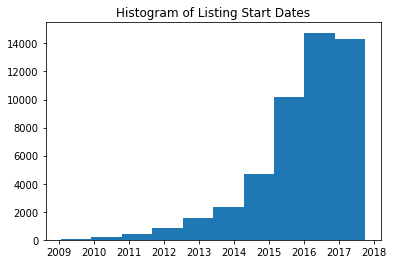

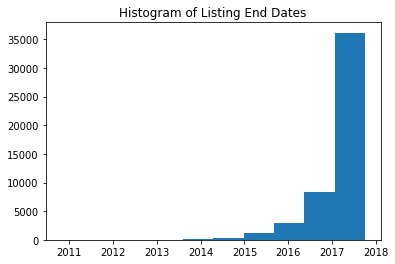

In [ ]:
## calculate and plot histogram of start dates
startDate = pd.to_datetime(df1['first_review'])
plt.hist(startDate)
plt.title('Histogram of Listing Start Dates')
plt.show()

## calculate and plot histogram of end dates
endDate = pd.to_datetime(df1['last_review'])
plt.hist(endDate)
plt.title('Histogram of Listing End Dates')
plt.show()


Calculate demand: sum of properties that fall within month $t$, 

---

multiplied by capacity $c$
$$D_t=\sum_i (1_{r_i\in t})(c_i)$$

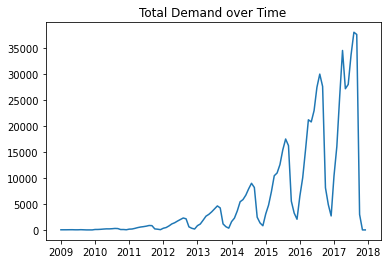

In [ ]:
demand = []
for y in range(2009,2018):
  for m in range(1,13):
    BOOL = (((y >= startDate.dt.year) & (m >= startDate.dt.month)) & 
            ((y <= endDate.dt.year) & (m <= endDate.dt.month)))
    demand.append(np.sum(df1['accommodates'][BOOL]))
    # print(f'({y},{m})', demand[-1])

plt.plot(demand)
plt.title('Total Demand over Time')
xTix = np.arange('2009','2019',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(demand)+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.


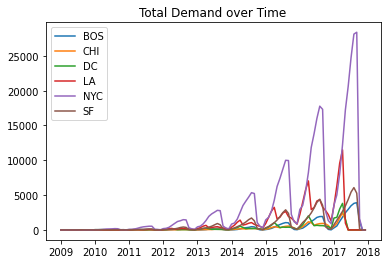

In [ ]:
## 'Boston' 'Chicago' 'DC' 'LA' 'NYC' 'SF'

demand_bos = []
demand_chi = []
demand_dc = []
demand_la = []
demand_nyc = []
demand_sf = []

for y in range(2009,2018):
  for m in range(1,13):
    BOOL = (((y >= startDate.dt.year) & (m >= startDate.dt.month)) & 
            ((y <= endDate.dt.year) & (m <= endDate.dt.month)))
    demand_bos.append(np.sum(df1['accommodates'][BOOL*df1['city']=='Boston']))
    demand_chi.append(np.sum(df1['accommodates'][BOOL*df1['city']=='Chicago']))
    demand_dc.append(np.sum(df1['accommodates'][BOOL*df1['city']=='DC']))
    demand_la.append(np.sum(df1['accommodates'][BOOL*df1['city']=='LA']))
    demand_nyc.append(np.sum(df1['accommodates'][BOOL*df1['city']=='NYC']))
    demand_sf.append(np.sum(df1['accommodates'][BOOL*df1['city']=='SF']))
    # print(f'({y},{m})', demand[-1])

plt.plot(demand_bos)
plt.plot(demand_chi)
plt.plot(demand_dc)
plt.plot(demand_la)
plt.plot(demand_nyc)
plt.plot(demand_sf)

plt.title('Total Demand over Time')
xTix = np.arange('2009','2019',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(demand)+12,step=12)
plt.xticks(xPos,xTix)
plt.legend([demand_bos,demand_chi,demand_dc,demand_la,demand_nyc,demand_sf],
           labels=['BOS','CHI','DC','LA','NYC','SF'])
plt.show()

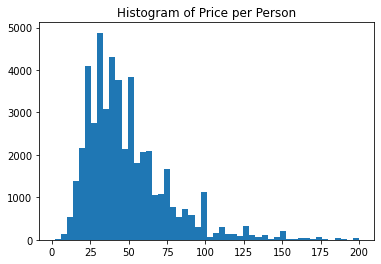

In [ ]:
plt.hist(df1['price_per_person'][df1['price_per_person'] < 200], bins = 50)
plt.title("Histogram of Price per Person")
plt.show()

/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


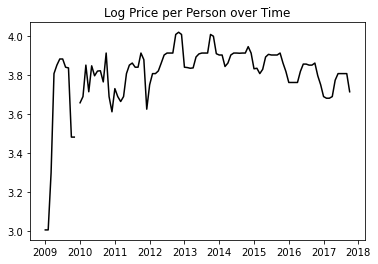

In [ ]:
## Price per person over time

medPPPs = []
minPPPs = []
maxPPPs = []

for y in range(2009,2018):
  for m in range(1,13):
    BOOL = (((y >= startDate.dt.year) & (m >= startDate.dt.month)) & 
            ((y <= endDate.dt.year) & (m <= endDate.dt.month)))
    medPPPs.append(np.median(df1['price_per_person'][BOOL]))
    minPPPs.append((df1['price_per_person'][BOOL]).quantile(.25))
    maxPPPs.append((df1['price_per_person'][BOOL]).quantile(.75))

plt.plot(np.log(medPPPs),c='black')
# plt.plot(np.log(minPPPs),c='red')
# plt.plot(np.log(maxPPPs),c='blue')
plt.title('Log Price per Person over Time')
xTix = np.arange('2009','2019',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(demand)+12,step=12)
plt.xticks(xPos,xTix)
# plt.legend([medPPPs,minPPPs,maxPPPs],labels=['median','25th %ile', '75th %ile'])
plt.show()

In [ ]:
##

citiez = ['Boston', 'Chicago', 'DC', 'LA', 'NYC', 'SF']

medPPPs_state = []
minPPPs_state = []
maxPPPs_state = []

for c in range(len(citiez)):
  medCiti = []
  minCiti = []
  maxCiti = []
  for y in range(2009,2018):
    for m in range(1,13):
      BOOL = (((y >= startDate.dt.year) & (m >= startDate.dt.month)) & 
              ((y <= endDate.dt.year) & (m <= endDate.dt.month)))
      medCiti.append(np.median(df1['price_per_person'][BOOL*df1['city']==citiez[c]]))
      minCiti.append((df1['price_per_person'][BOOL*df1['city']==citiez[c]]).quantile(.25))
      maxCiti.append((df1['price_per_person'][BOOL*df1['city']==citiez[c]]).quantile(.75))
  medPPPs_state.append(medCiti)
  minPPPs_state.append(minCiti)
  maxPPPs_state.append(maxCiti)


/usr/local/lib/python3.6/dist-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.6/dist-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


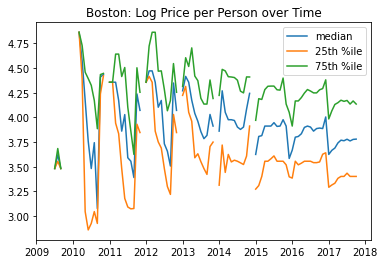

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


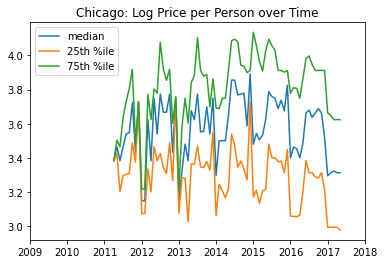

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


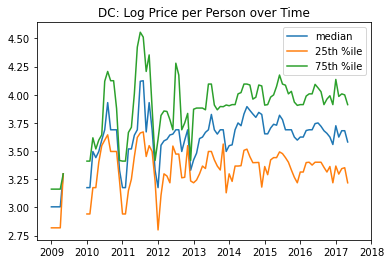

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


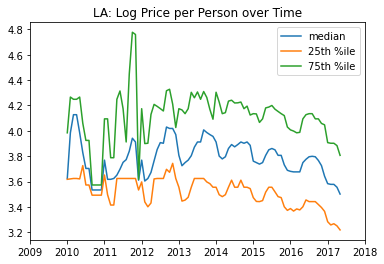

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


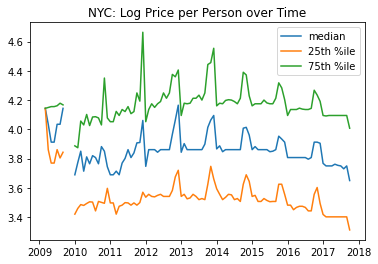

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  # This is added back by InteractiveShellApp.init_path()


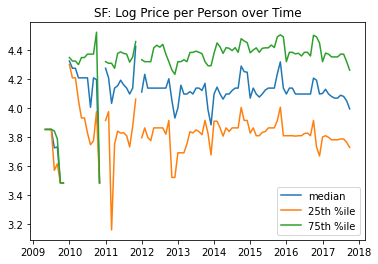

In [ ]:
for c in range(len(citiez)):
  plt.plot(np.log(medPPPs_state[c]))
  plt.plot(np.log(minPPPs_state[c]))
  plt.plot(np.log(maxPPPs_state[c]))
  titleTxt = citiez[c]+': Log Price per Person over Time' 
  plt.title(titleTxt)
  xTix = np.arange('2009','2019',dtype='datetime64[Y]')
  xPos = np.arange(start=0,stop=len(demand)+12,step=12)
  plt.xticks(xPos,xTix)
  # plt.legend(medPPPs_state,labels=citiez)
  plt.legend([medPPPs_state[c],minPPPs_state[c],maxPPPs_state[c]],labels=['median','25th %ile', '75th %ile'])
  plt.show()

## Fitting Sigmoidal Curve

Sigmoid Curve models demand $D$ for scale parameter $c$, shape parameter $a$, location parameter $b$, and input $x$ as log price per person:
$$D(x)|a,b,c = \frac{c}{1+e^{-a(x-b)}}$$

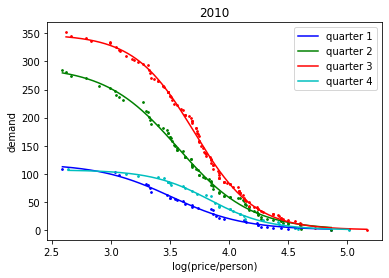

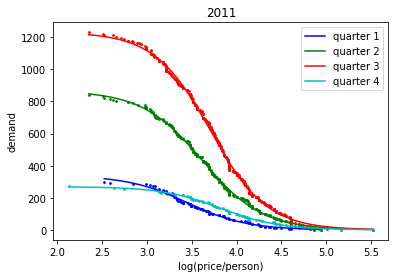

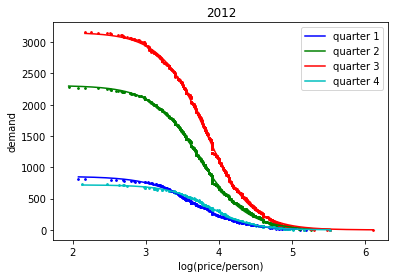

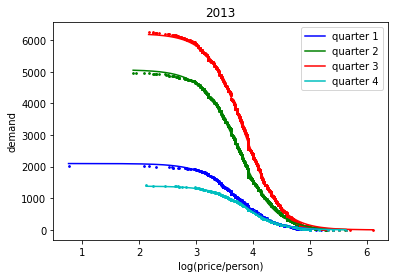

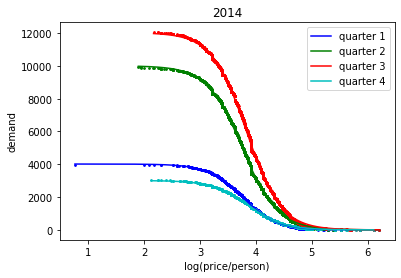

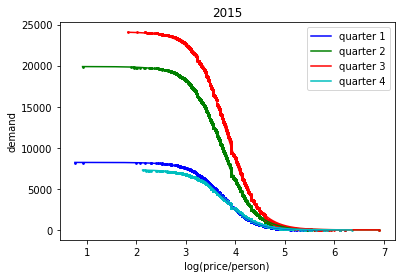

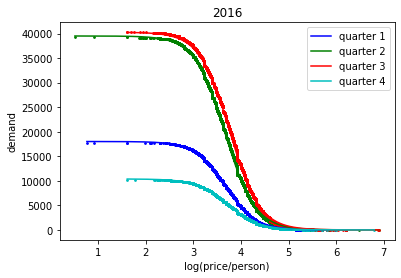

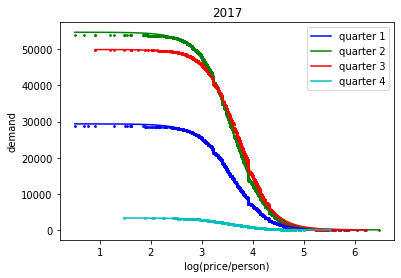

In [ ]:
coeffs = []

def sigmoid(x,c,a,b):
  return(c / (1.0 + np.exp(-a*(x-b))))

rainbo = np.array(['b','g','r','c'])
b_patch = mpatches.Patch(color='b', label='Quarter 1')
g_patch = mpatches.Patch(color='g', label='Quarter 2')
r_patch = mpatches.Patch(color='r', label='Quarter 3')
c_patch = mpatches.Patch(color='c', label='Quarter 4')

## create overall demand curves for each year
for y in range(2010,2018):
  for q in range(1,5):
    demand = []
    BOOL1 = (y >= startDate.dt.year) & (q >= startDate.dt.quarter)
    BOOL2 = (y <= endDate.dt.year) & (q <= endDate.dt.quarter)
    BOOL = BOOL1 & BOOL2 ## True if in timeframe

    prices = np.log(df1['price_per_person'][BOOL])
    accommodates = df1['accommodates'][BOOL]
    for p in prices:
      demand.append(np.sum(accommodates[prices>p]))
    prices = np.array(prices)
    demand = np.array(demand)

    popt, pcov = curve_fit(sigmoid, prices, demand, p0=[np.median(demand),4,np.median(prices)])
    xs = np.linspace(np.min(prices),np.max(prices),500)
    ys = sigmoid(xs,popt[0],popt[1],popt[2])
    coeffs.append(popt)

    plt.plot(xs,ys,label=f'quarter {q}',c=rainbo[q-1])
    plt.scatter(prices,demand,s=3,c=rainbo[q-1])
  plt.title(y) ## year and quarter
  plt.xlabel('log(price/person)')
  plt.ylabel('demand')
  plt.legend()
  plt.show()

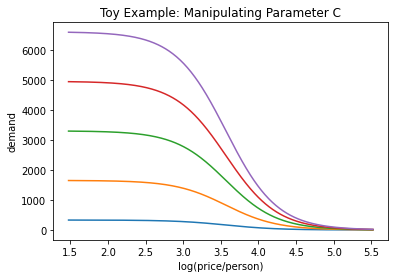

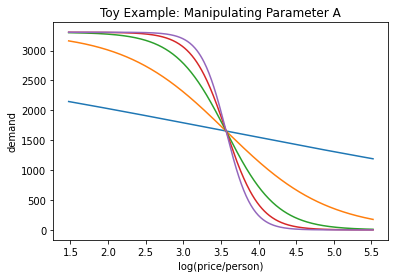

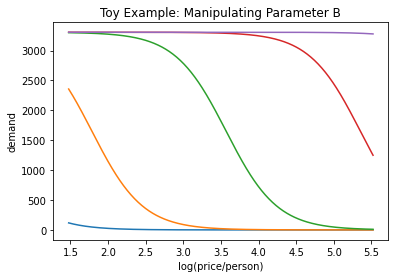

In [ ]:
whichVar = np.array(['C','A','B'])
testC = popt[0]
testA = popt[1]
testB = popt[2]
mults = np.array([0.1, 0.5, 1, 1.5, 2])

for i in range(3):
  for j in range(len(mults)):
    useC = testC
    useA = testA
    useB = testB
    if i==0:
      useC = testC*mults[j]
    elif i==1:
      useA = testA*mults[j]
    else: 
      useB = testB*mults[j]
    ys = sigmoid(xs,useC,useA,useB)
    plt.plot(xs,ys)
  plt.title('Toy Example: Manipulating Parameter %s' %whichVar[i])
  plt.xlabel('log(price/person)')
  plt.ylabel('demand')
  plt.show()

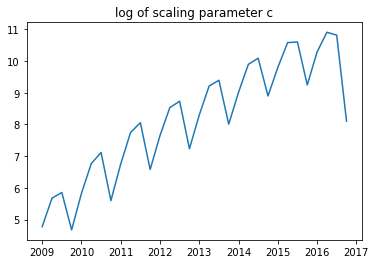

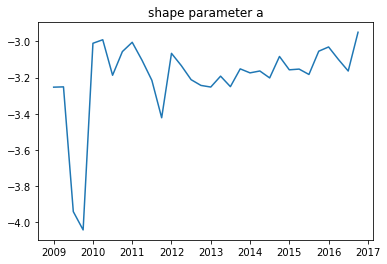

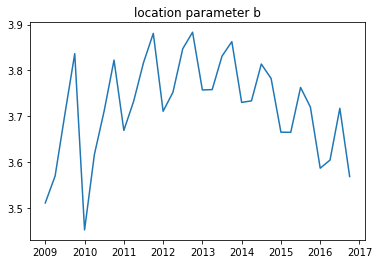

In [ ]:
coeffs = np.array(coeffs)
# print(coeffs)

C = coeffs[:,0]
logC = np.log(coeffs[:,0])
plt.plot(logC)
plt.title('log of scaling parameter c')
xTix = np.arange('2009','2019',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.show()

A = coeffs[:,1]
plt.plot(A)
plt.title('shape parameter a')
xTix = np.arange('2009','2019',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(A)+4,step=4)
plt.xticks(xPos,xTix)
plt.show()

B = coeffs[:,2]
plt.plot(B)
plt.title('location parameter b')
xTix = np.arange('2009','2019',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(B)+4,step=4)
plt.xticks(xPos,xTix)
plt.show()

## Fitting ARIMA Models for Sigmoid Parameters


### Scale Parameter $c$

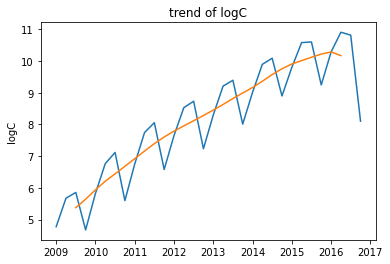

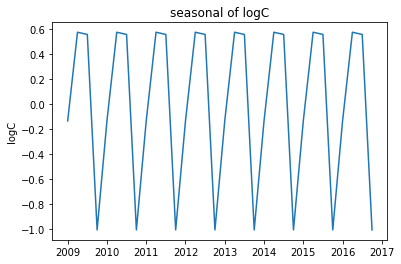

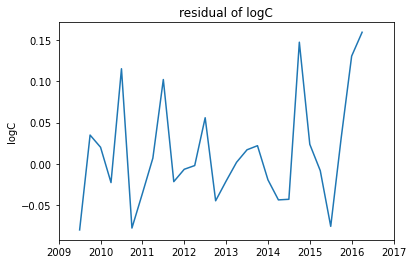

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(logC,freq=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(logC)
plt.plot(trend)
plt.title('trend of logC')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.ylabel('logC')
plt.show()

plt.plot(seasonal)
plt.title('seasonal of logC')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.ylabel('logC')
plt.show()

plt.plot(residual)
plt.title('residual of logC')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.ylabel('logC')
plt.show()

trendLogC = trend
seasLogC = seasonal
residLogC = residual

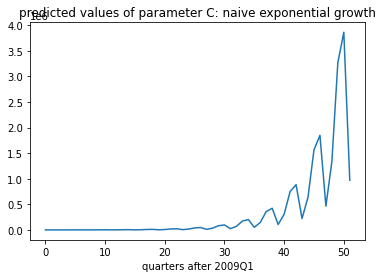

In [ ]:
xs = np.arange(len(trend))[~np.isnan(trend)]
ys = trend[~np.isnan(trend)]

from scipy.stats import linregress

model = linregress(xs,ys)
preds1 = model.slope * np.arange(52) + model.intercept
# print(preds1)

preds2 = list(seasonal) * 3
preds2 = preds2[:52]

predsLogC = preds1+preds2
predsC = np.exp(predsLogC)

plt.plot(predsC)
plt.title('predicted values of parameter C: naive exponential growth')
plt.xlabel('quarters after 2009Q1')
plt.show()

### Location Parameter $b$

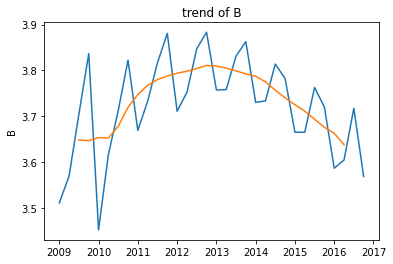

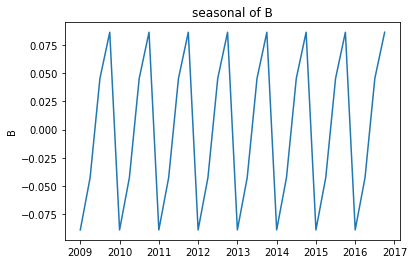

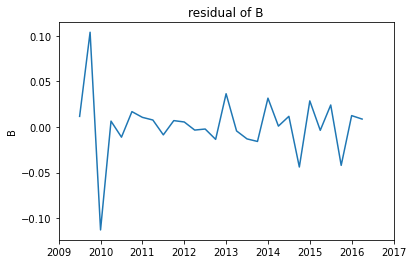

In [ ]:
decomposition = seasonal_decompose(B,freq=4)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(B)
plt.plot(trend)
plt.title('trend of B')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.ylabel('B')
plt.show()

plt.plot(seasonal)
plt.title('seasonal of B')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.ylabel('B')
plt.show()

plt.plot(residual)
plt.title('residual of B')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(C)+4,step=4)
plt.xticks(xPos,xTix)
plt.ylabel('B')
plt.show()

trendB = trend
seasB = seasonal
residB = residual

### Naive Prediction Models

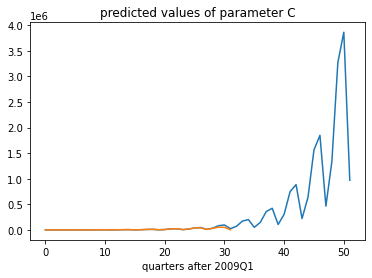

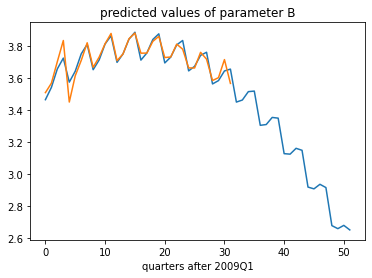

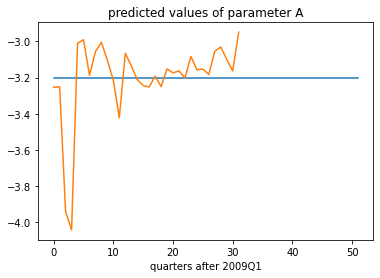

In [ ]:
def quad(x,a,b,c):
    return(a*x**2 + b*x + c)

ys = trend[xs]

popt, pcov = curve_fit(quad, xs, ys, p0=[-2,5,3.8])
preds1 = quad(np.arange(52),popt[0],popt[1],popt[2])

preds2 = list(seasonal) * 3
preds2 = preds2[:52]

predsB = preds1+preds2

predsA = np.array([np.mean(A)] * 52)

plt.plot(predsC)
plt.plot(C)
plt.title('predicted values of parameter C')
plt.xlabel('quarters after 2009Q1')
plt.show()

plt.plot(predsB)
plt.plot(B)
plt.title('predicted values of parameter B')
plt.xlabel('quarters after 2009Q1')
plt.show()

plt.plot(predsA)
plt.plot(A)
plt.title('predicted values of parameter A')
plt.xlabel('quarters after 2009Q1')
plt.show()

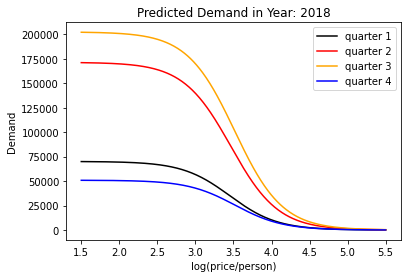

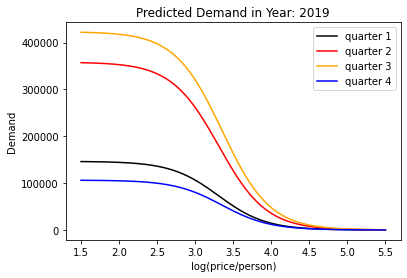

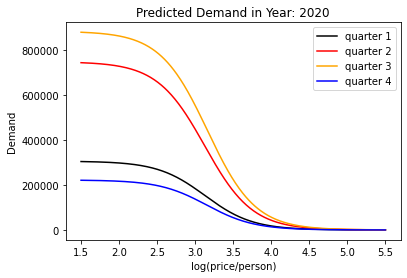

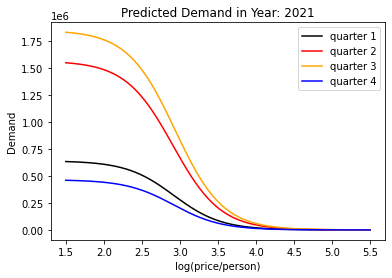

In [ ]:
palette = ['black','red','orange','blue']

n = len(coeffs)
for i in range(32,48):
    xs = np.linspace(1.5,5.5,500)
    ys = sigmoid(xs,predsC[i],predsA[i],predsB[i])
    quarter = i % 4 + 1
    plt.plot(xs,
             ys,
             color=palette[quarter-1],
             label=f'quarter {quarter}')
    if quarter == 4:
        plt.title(f'Predicted Demand in Year: {int(2009+np.ceil(i/4))}')
        plt.xlabel('log(price/person)')
        plt.ylabel('Demand')
        plt.legend()
        plt.show()

## ARIMA for Overall Median Price

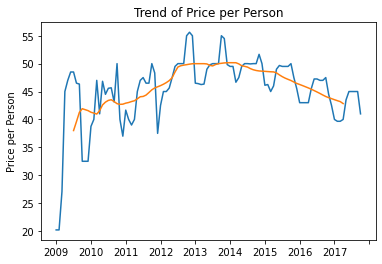

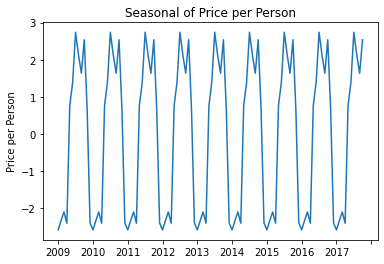

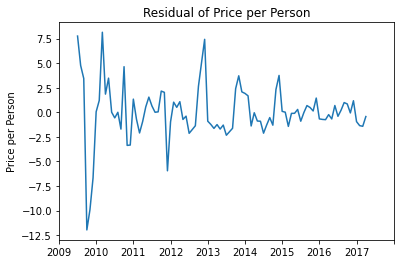

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

medPPPs = pd.DataFrame(medPPPs[:-2])
medPPPs = medPPPs.fillna(32.5)

decomposition = seasonal_decompose(medPPPs,freq=12)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.plot(medPPPs)
plt.plot(trend)
plt.title('Trend of Price per Person')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(medPPPs)+12,step=12)
plt.xticks(xPos,xTix)
plt.ylabel('Price per Person')
plt.show()

plt.plot(seasonal)
plt.title('Seasonal of Price per Person')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(medPPPs)+12,step=12)
plt.xticks(xPos,xTix)
plt.ylabel('Price per Person')
plt.show()

plt.plot(residual)
plt.title('Residual of Price per Person')
xTix = np.arange('2009','2018',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=len(medPPPs)+12,step=12)
plt.xticks(xPos,xTix)
plt.ylabel('Price per Person')
plt.show()

trendPPP = np.asarray(trend)
seasPPP = np.asarray(seasonal)
residPPP = np.asarray(residual)

# AIRBNB DATA (INSIDE AIRBNB)

Boston Listings: https://drive.google.com/open?id=11XI0eFnbQwI-ZYUN1luQxWqaIB_43y9s
Boston Reviews: https://drive.google.com/open?id=1wJPIeIFb0IojxoEmcYigUhXK6g8-ZxUQ

Chicago Listings: https://drive.google.com/open?id=1IPq0W86KDvGtNuEVWpZyeH9nWU3TKicW
Chicago Reviews: https://drive.google.com/open?id=10uMphDj0PgjCnC1bG_1ENZXQxEAB2ysQ

DC Listings: https://drive.google.com/open?id=1qnGocbl6DF9UbcXQZ67Xi2T5LOowcMiT
DC Reviews: https://drive.google.com/open?id=1t0yleuRkBZtQ3RoMYu3b9qo0mIc9Tu8z

LA Listings: https://drive.google.com/open?id=1XMClsdaVSnh99yTb0juxVWt9M2LuPyHx
LA Reviews: https://drive.google.com/open?id=1PunPuTPd6nEcGKPS_INBvWxnQCUXyOBQ

NYC Listings: https://drive.google.com/open?id=1vi97ciQwnYdUizvHOA6Beo9sTuP_j0BF
NYC Reviews: https://drive.google.com/open?id=1fenpYGyH5i2mGiWr5LHgiS2Os7Kh7PE1

SF Listings: https://drive.google.com/open?id=1YvyAjQvzR-dHVr7U8ltqKv0TQm32rIyx
SF Reviews: https://drive.google.com/open?id=1yHG0JLry14x0tr5liSQSVAWb0FVmdd-r



In [ ]:
## into dataframe

## Bos
downloaded = drive.CreateFile({'id':"11XI0eFnbQwI-ZYUN1luQxWqaIB_43y9s"})
downloaded.GetContentFile('bos_listings.csv')
list_bos = pd.read_csv('bos_listings.csv')

downloaded = drive.CreateFile({'id':"1wJPIeIFb0IojxoEmcYigUhXK6g8-ZxUQ"})
downloaded.GetContentFile('bos_reviews.csv')
rev_bos = pd.read_csv('bos_reviews.csv')

## Chi
downloaded = drive.CreateFile({'id':"1IPq0W86KDvGtNuEVWpZyeH9nWU3TKicW"})
downloaded.GetContentFile('chi_listings.csv')
list_chi = pd.read_csv('chi_listings.csv')

downloaded = drive.CreateFile({'id':"10uMphDj0PgjCnC1bG_1ENZXQxEAB2ysQ"})
downloaded.GetContentFile('chi_reviews.csv')
rev_chi = pd.read_csv('chi_reviews.csv')

## DC
downloaded = drive.CreateFile({'id':"1qnGocbl6DF9UbcXQZ67Xi2T5LOowcMiT"})
downloaded.GetContentFile('dc_listings.csv')
list_dc = pd.read_csv('dc_listings.csv')

downloaded = drive.CreateFile({'id':"1t0yleuRkBZtQ3RoMYu3b9qo0mIc9Tu8z"})
downloaded.GetContentFile('dc_reviews.csv')
rev_dc = pd.read_csv('dc_reviews.csv')

## LA
downloaded = drive.CreateFile({'id':"1XMClsdaVSnh99yTb0juxVWt9M2LuPyHx"})
downloaded.GetContentFile('la_listings.csv')
list_la = pd.read_csv('la_listings.csv')

downloaded = drive.CreateFile({'id':"1PunPuTPd6nEcGKPS_INBvWxnQCUXyOBQ"})
downloaded.GetContentFile('la_reviews.csv')
rev_la = pd.read_csv('la_reviews.csv')

## NYC
downloaded = drive.CreateFile({'id':"1vi97ciQwnYdUizvHOA6Beo9sTuP_j0BF"})
downloaded.GetContentFile('nyc_listings.csv')
list_nyc = pd.read_csv('nyc_listings.csv')

downloaded = drive.CreateFile({'id':"1fenpYGyH5i2mGiWr5LHgiS2Os7Kh7PE1"})
downloaded.GetContentFile('nyc_reviews.csv')
rev_nyc = pd.read_csv('nyc_reviews.csv')

## SF
downloaded = drive.CreateFile({'id':"1YvyAjQvzR-dHVr7U8ltqKv0TQm32rIyx"})
downloaded.GetContentFile('sf_listings.csv')
list_sf = pd.read_csv('sf_listings.csv')

downloaded = drive.CreateFile({'id':"1yHG0JLry14x0tr5liSQSVAWb0FVmdd-r"})
downloaded.GetContentFile('sf_reviews.csv')
rev_sf = pd.read_csv('sf_reviews.csv')


# AIRDNA DATA

LA: https://drive.google.com/open?id=1Ww8yDRhMS2vpVkMRi9RFYCAVG5r45c34

1Ww8yDRhMS2vpVkMRi9RFYCAVG5r45c34

NYC: https://drive.google.com/open?id=1DnyCxiU70o2AkEwrjoZYsJ-AsF3yziUd

1DnyCxiU70o2AkEwrjoZYsJ-AsF3yziUd

In [ ]:
## into dataframe

## LA
downloaded = drive.CreateFile({'id':"1Ww8yDRhMS2vpVkMRi9RFYCAVG5r45c34"})
downloaded.GetContentFile('USE_AirDNA_LA.xlsx')
airdna_la = pd.read_excel("USE_AirDNA_LA.xlsx", 'use')
print(airdna_la.head())

## NYC
downloaded = drive.CreateFile({'id':"1DnyCxiU70o2AkEwrjoZYsJ-AsF3yziUd"})
downloaded.GetContentFile('USE_AirDNA_NYC.xlsx')
airdna_nyc = pd.read_excel("USE_AirDNA_NYC.xlsx", 'use')
print(airdna_nyc.head())

## splitting

dates_air = pd.to_datetime(airdna_nyc['Date'])

## listing nights available
avail_place_nyc = np.asmatrix(airdna_nyc)[:,11].astype(float)
avail_hotel_nyc = np.asmatrix(airdna_nyc)[:,12].astype(float)
 ## occupancy
occ_place_nyc = np.asmatrix(airdna_nyc)[:,13].astype(float)
occ_hotel_nyc = np.asmatrix(airdna_nyc)[:,14].astype(float)
## avg daily rate
adr_place_nyc = np.asmatrix(airdna_nyc)[:,15].astype(float)
adr_hotel_nyc = np.asmatrix(airdna_nyc)[:,16].astype(float)
## revenue per avail room
revpar_place_nyc = np.asmatrix(airdna_nyc)[:,17].astype(float)
revpar_hotel_nyc = np.asmatrix(airdna_nyc)[:,18].astype(float)

## listing nights available
avail_place_la = np.asmatrix(airdna_la)[:,11].astype(float)
avail_hotel_la = np.asmatrix(airdna_la)[:,12].astype(float)
## occupancy
occ_place_la = np.asmatrix(airdna_la)[:,13].astype(float) ## occupancy, entire place
occ_hotel_la = np.asmatrix(airdna_la)[:,14].astype(float) ## occupancy, hotel comparable
## avg daily rate
adr_place_la = np.asmatrix(airdna_la)[:,15].astype(float)
adr_hotel_la = np.asmatrix(airdna_la)[:,16].astype(float)
## revenue per avail room
revpar_place_la = np.asmatrix(airdna_la)[:,17].astype(float)
revpar_hotel_la = np.asmatrix(airdna_la)[:,18].astype(float)

        Date  ...  RevPAR, Hotel Comparable
0 2014-10-01  ...                 74.412591
1 2014-11-01  ...                 69.269146
2 2014-12-01  ...                 61.776215
3 2015-01-01  ...                 71.141826
4 2015-02-01  ...                 82.575257

[5 rows x 19 columns]
        Date  ...  RevPAR, Hotel Comparable
0 2014-10-01  ...                132.911598
1 2014-11-01  ...                106.029822
2 2014-12-01  ...                101.424691
3 2015-01-01  ...                 74.368453
4 2015-02-01  ...                 80.025498

[5 rows x 19 columns]


In [ ]:
print(airdna_la.iloc[:,0])

0    2014-10-01
1    2014-11-01
2    2014-12-01
3    2015-01-01
4    2015-02-01
        ...    
60   2019-10-01
61   2019-11-01
62   2019-12-01
63   2020-01-01
64   2020-02-01
Name: Date, Length: 65, dtype: datetime64[ns]


## Exploratory Analysis

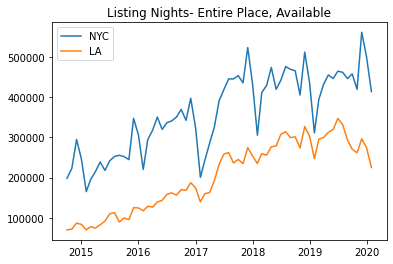

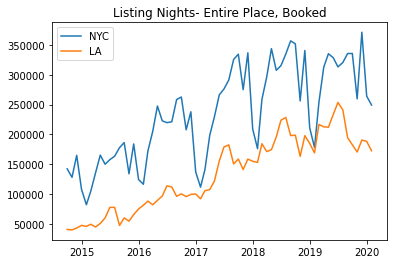

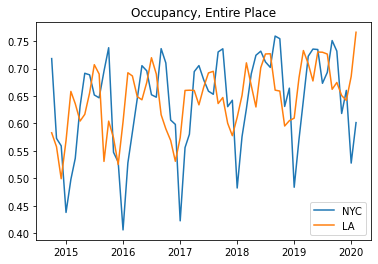

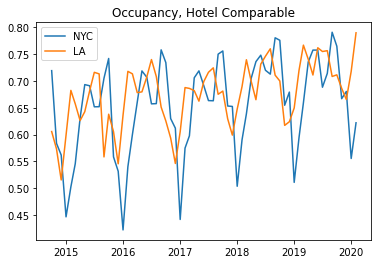

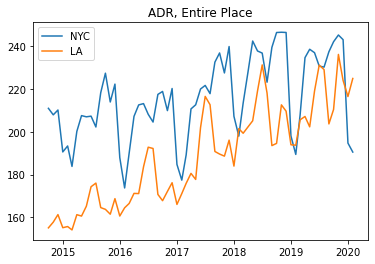

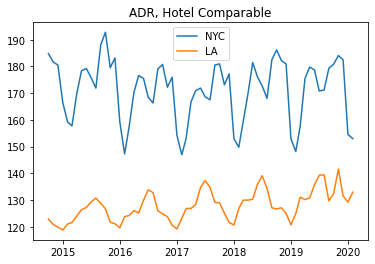

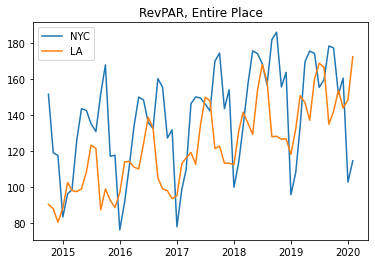

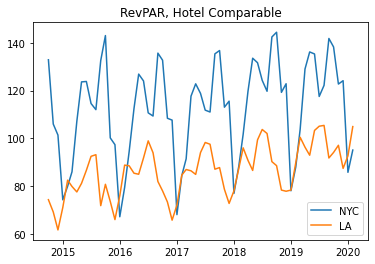

In [ ]:
## plot each metric between NYC, LA

for i in range(11,19):
  plt.plot(dates_air,airdna_nyc.iloc[:,i])
  plt.plot(dates_air,airdna_la.iloc[:,i])
  plt.title(airdna_nyc.columns[i])
  plt.legend(labels=['NYC','LA'])
  plt.show()




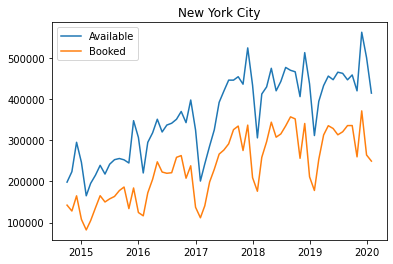

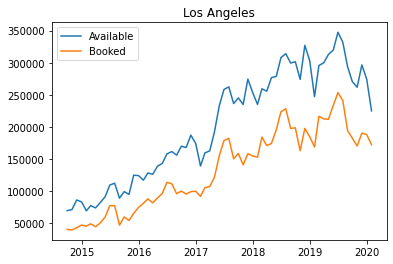

In [ ]:
## plot capacity / demand

plt.plot(dates_air,airdna_nyc.iloc[:,11])
plt.plot(dates_air,airdna_nyc.iloc[:,12])
plt.legend(labels=['Available','Booked'])
plt.title('New York City')
plt.show()

plt.plot(dates_air,airdna_la.iloc[:,11])
plt.plot(dates_air,airdna_la.iloc[:,12])
plt.legend(labels=['Available','Booked'])
plt.title('Los Angeles')
plt.show()

NOTE: in both cities, the more recent / detailed breakdown shows that, in both cities, capacity and actual demand fluctuate in lockstep; ie occupancy would be exacerbated if not for flexibility of AirDNA capacity. Thus in this case capacity is good proxy for demand

## ARIMA Decomp

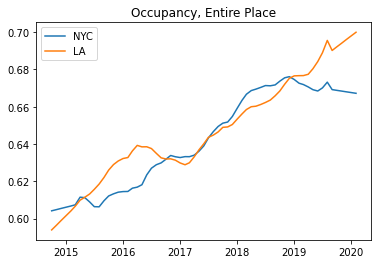

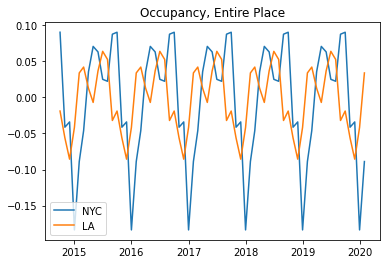

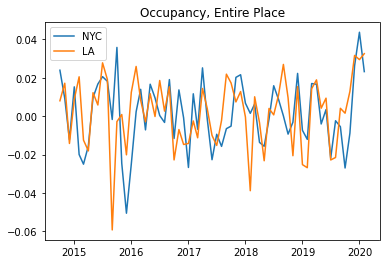

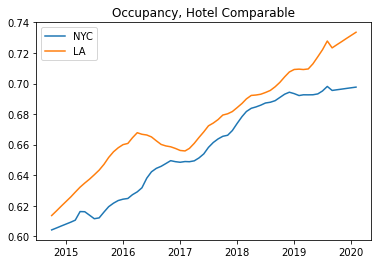

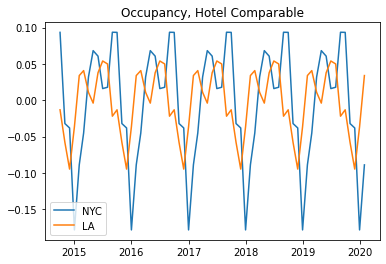

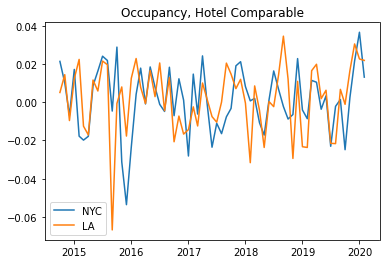

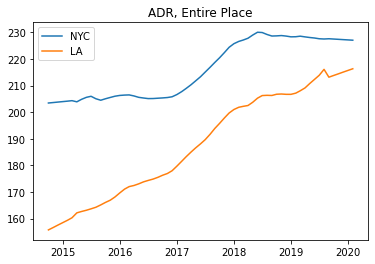

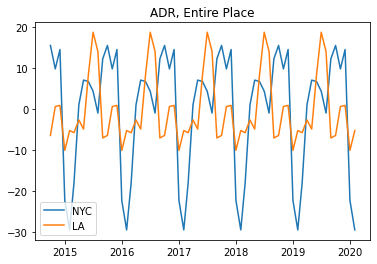

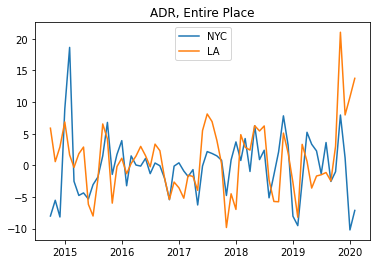

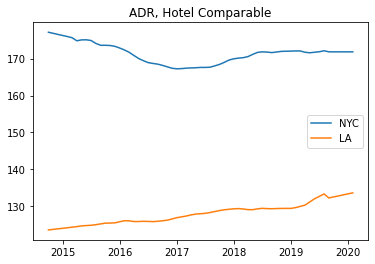

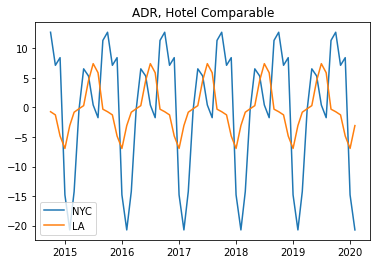

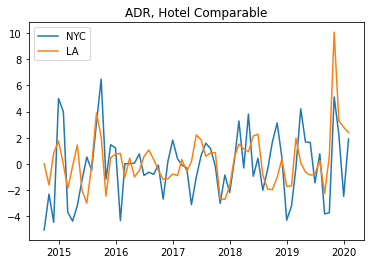

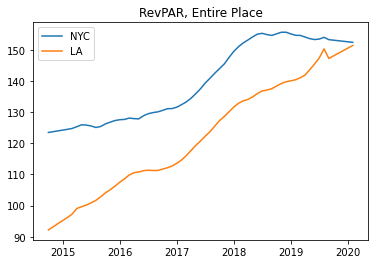

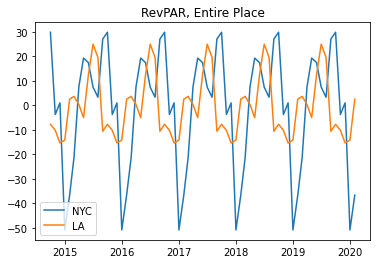

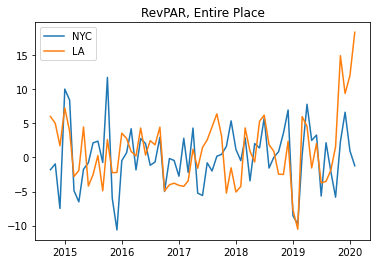

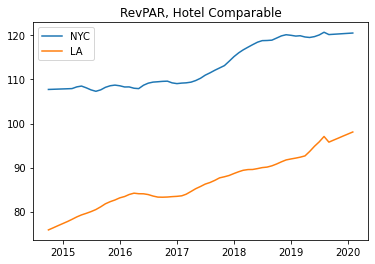

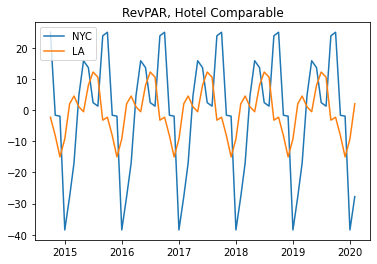

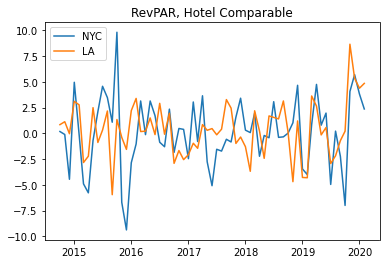

In [ ]:
## ARIMA decomp for relevant vars

from statsmodels.tsa.seasonal import seasonal_decompose

airYears = airdna_la.shape[0]
## [0] occ. entire place
## [1] occ. hotel comp
## [2] adr entire place
## [3] adr hotel comp
## [4] revpar entire place
## [5] revpar hotel comp
trends_la = np.zeros((airYears,6))
seas_la = np.zeros((airYears,6))
resids_la = np.zeros((airYears,6))

trends_nyc = np.zeros((airYears,6))
seas_nyc = np.zeros((airYears,6))
resids_nyc = np.zeros((airYears,6))

airLabels = []

for i in range(13,19):
  decomp_la = seasonal_decompose(airdna_la.iloc[:,i],freq=12,extrapolate_trend='freq')
  trend_la = decomp_la.trend
  seasonal_la = decomp_la.seasonal
  residual_la = decomp_la.resid

  decomp_nyc = seasonal_decompose(airdna_nyc.iloc[:,i],freq=12,extrapolate_trend='freq')
  trend_nyc = decomp_nyc.trend
  seasonal_nyc = decomp_nyc.seasonal
  residual_nyc = decomp_nyc.resid

  trends_la[:,i-13] = trend_la
  seas_la[:,i-13] = seasonal_la
  resids_la[:,i-13] = residual_la

  trends_nyc[:,i-13] = trend_nyc
  seas_nyc[:,i-13] = seasonal_nyc
  resids_nyc[:,i-13] = residual_nyc

  plt.plot(dates_air,trend_nyc)
  plt.plot(dates_air,trend_la)
  plt.title(airdna_nyc.columns[i])
  plt.legend(labels=['NYC','LA'])
  plt.show()

  plt.plot(dates_air,seasonal_nyc)
  plt.plot(dates_air,seasonal_la)
  plt.title(airdna_nyc.columns[i])
  plt.legend(labels=['NYC','LA'])
  plt.show()

  plt.plot(dates_air,residual_nyc)
  plt.plot(dates_air,residual_la)
  plt.title(airdna_nyc.columns[i])
  plt.legend(labels=['NYC','LA'])
  plt.show()

  airLabels.append(airdna_nyc.columns[i])


In [ ]:
airRev_seasonal = seas_la[-14:-2,4]
airRev_noise = np.var(resids_la[:,4])

# ECON DATA

In [ ]:
## upload file from GDrive
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

Kaggle Airbnb Dataset:
\\
https://drive.google.com/open?id=1lpev6g_Q_RgLzGG0GT93HFeWxc8kF67P
\\
1lpev6g_Q_RgLzGG0GT93HFeWxc8kF67P

Econ Index TEST Data:
\\
https://drive.google.com/open?id=1IApOyWF11wLyZWst653ycXqZhbcKD6QX
\\
1IApOyWF11wLyZWst653ycXqZhbcKD6QX

Econ Index USE Data:
\\
https://drive.google.com/open?id=1Gh1nNroAMQBdw9k_yDhN0bUGmkGVHYAf
\\
1Gh1nNroAMQBdw9k_yDhN0bUGmkGVHYAf

Zillow Rent Timeseries:
\\
https://drive.google.com/open?id=1iyqglwI0WU89T4gWBKcJm6ugOp0zJBJ-
\\
1iyqglwI0WU89T4gWBKcJm6ugOp0zJBJ-

In [ ]:
## into dataframe (TEST)
# downloaded = drive.CreateFile({'id':"1IApOyWF11wLyZWst653ycXqZhbcKD6QX"})
# downloaded.GetContentFile('Econ_Data_TEST.xlsx')

# inData = pd.read_excel("Econ_Data_TEST.xlsx", 'Asset-Real Returns')
# print(inData.head())

# rreturnsT = np.asmatrix(inData)
# rreturnsT = rreturnsT[:,1:].astype(float)

# inData = pd.read_excel("Econ_Data_TEST.xlsx", 'S&P 500')
# print(inData.head())

# sp500T = np.asmatrix(inData)[:,1:].astype(float)


In [ ]:
## into dataframe
downloaded = drive.CreateFile({'id':"1Gh1nNroAMQBdw9k_yDhN0bUGmkGVHYAf"})
downloaded.GetContentFile('Econ_Data_USE.xlsx')

df_rateReturns = pd.read_excel("Econ_Data_USE.xlsx", 'Asset-Real Returns',parse_dates=True)

print(df_rateReturns.head())
rreturnsU = np.asarray(df_rateReturns)
dates_econ = pd.to_datetime(rreturnsU[:,0])
rreturnsU = np.asmatrix(rreturnsU[:,1:]).astype(float)

df_rawReturns = pd.read_excel("Econ_Data_USE.xlsx", 'Raw',parse_dates=True)
df_rawReturns.drop(df_rawReturns.tail(1).index,inplace=True)
print(df_rawReturns.head())

  Unnamed: 0  US Equities  ...  Rental Rate  Hotel PPI
0 1990-01-01    -0.068817  ...    -0.001398        NaN
1 1990-02-01     0.008539  ...    -0.001400        NaN
2 1990-03-01     0.024255  ...    -0.001402        NaN
3 1990-04-01    -0.026887  ...    -0.013333        NaN
4 1990-05-01     0.091989  ...    -0.013514        NaN

[5 rows x 9 columns]
        Date US Equities US Treasuries  ... Rental Vacancy Rental Rate Hotel PPI
0 1990-01-01      329.08       1982.91  ...            7.2     476.333       NaN
1 1990-02-01      331.89       1958.85  ...            7.3     475.667       NaN
2 1990-03-01      339.94        1941.2  ...            7.4         475       NaN
3 1990-04-01       330.8       1881.25  ...        7.23333     468.667       NaN
4 1990-05-01      361.23       1949.73  ...        7.06667     462.333       NaN

[5 rows x 9 columns]


In [ ]:

lengt = len(rreturnsU)

hotelPPI = rreturnsU[:,7]
short = (hotelPPI[~np.isnan(hotelPPI)]).size

print(lengt)
print(short)

rreturnsU_l = rreturnsU[:,:7]
rreturnsU_s = rreturnsU[lengt-short:,:]

## check:
# print('without hotel PPI')
# print(rreturnsU_l[:5,:])
# print('with hotel PPI')
# print(rreturnsU_s[:5,:])

inData = pd.read_excel("Econ_Data_USE.xlsx", 'S&P 500')
sp500U = np.asmatrix(inData)[:,1:].astype(float)

sp500U_l = sp500U
sp500U_s = sp500U[lengt-short:]

## check:
# print('without hotel PPI')
# print(sp500U_l[:5])
# print('with hotel PPI')
# print(sp500U_s[:5])

inData = pd.read_excel("Econ_Data_USE.xlsx", 'Scratch')
print(inData.head())
scratch = np.asarray(inData)


360
193
  1990-01-01 00:00:00 -0.06881720430107525  ... Unnamed: 21 Unnamed: 22
0          1990-02-01           0.00853896  ...         NaN         NaN
1          1990-03-01             0.024255  ...         NaN         NaN
2          1990-04-01           -0.0268871  ...         NaN         NaN
3          1990-05-01            0.0919891  ...         NaN         NaN
4          1990-06-01          -0.00888631  ...         NaN         NaN

[5 rows x 23 columns]


## Regression: Rent

In [ ]:
## create training dataset

rentStartDate = pd.to_datetime('19910101',format='%Y%m%d',errors='ignore')
rentStartDate = dates_econ[0] + pd.DateOffset(months=12)
print(rentStartDate)

airStartDate = dates_air[0] + pd.DateOffset(months=12)
print(airStartDate)

endDate = pd.to_datetime('20191201',format='%Y%m%d',errors='ignore')
print(endDate)

inTime = dates_econ >= rentStartDate
forRentDat = df_rawReturns[inTime]
vacDat = forRentDat['Rental Vacancy']
rentDat = forRentDat['Rental Rate']
assInd = ['US Equities','US Treasuries','High Yield ','Real Estate','Commodities']
forRentDat = forRentDat[assInd]

forRentDat = np.asarray(forRentDat)
print(forRentDat.shape)

## add shifted historical terms, up to 1 year in the past
for m in range(1,13):
  BOOL = ( dates_econ >= rentStartDate-pd.DateOffset(months=m) ) & ( dates_econ <= endDate-pd.DateOffset(months=m) )
  joiner = np.asarray(df_rawReturns[BOOL][assInd])
  forRentDat = np.concatenate((forRentDat,joiner),axis=1)

print(forRentDat.shape)

numVars = forRentDat.shape[1]
for i in range(numVars):
  for j in range(numVars):
    inter_term = np.ones((forRentDat.shape[0]))
    inter_term = np.multiply(inter_term,forRentDat[:,i])
    inter_term = np.multiply(inter_term,forRentDat[:,j])
    inter_term = np.transpose(np.array(inter_term, ndmin=2))
    forRentDat = np.column_stack((forRentDat,inter_term))

print(forRentDat.shape)


1991-01-01 00:00:00
2015-10-01 00:00:00
2019-12-01 00:00:00
(348, 5)
(348, 65)
(348, 4290)


NOTE: want to prevent contamination of the testing set, so isolate the latest 20% of data

In [ ]:
## test / train split

testProp = .8
testInd = int(forRentDat.shape[0]*testProp)

trainRentX = forRentDat[:testInd,:] ## train on first 80%
testRentX = forRentDat[testInd:,:]

trainVacY = vacDat[:testInd]
testVacY = vacDat[testInd:]

trainRentY = rentDat[:testInd]
testRentY = rentDat[testInd:]

print(trainRentX.shape)
print(trainVacY.shape)
print(trainRentY.shape)

(278, 4290)
(278,)
(278,)


In [ ]:
## train rentDat on forRentDat

regLasso = Ridge(fit_intercept=True, normalize=True)
alphas = np.linspace(195, 205, 10)
tunedParameters = {'alpha':alphas}

## further split train into 5 for cross-val
cvEstimator = GridSearchCV(regLasso, tunedParameters, cv=5, refit=True)
cvEstimator.fit(trainRentX,trainRentY)

rent_ridgePred = cvEstimator.best_estimator_
rent_ridgeAlpha = cvEstimator.best_params_['alpha']


In [ ]:
## evaluate rentDat
print(np.sum(rent_ridgePred.coef_>0))
print(rent_ridgeAlpha)

print(rent_ridgePred.score(trainRentX,trainRentY))
print(rent_ridgePred.score(testRentX,testRentY))

4139
201.66666666666666
0.8575474402603552
0.6446857857378169


## Regression: AirDNA

In [ ]:
## new trainX dataset for airDNA trends
## all data ends at 12/2019 for uniformity

print(forRentDat.shape)

forAirDat = forRentDat[forRentDat.shape[0]-airYears+2:,:]

print(forAirDat.shape)
print(airYears)

(348, 4290)
(63, 4290)
65


In [ ]:
## TBU: new trainY dataset from airDNA trends

regAirY_la = trends_la[:-2,:]
regAirY_nyc = trends_nyc[:-2,:]
print(regAirY_nyc.shape)


(63, 6)


In [ ]:
## test / train split

testProp = .8 ## how much of data will be used for training vs. testing?
testInd = int(forAirDat.shape[0]*testProp)

trainAirX = forAirDat[:testInd,:] ## train on first 80%
testAirX = forAirDat[testInd:,:]

trainAirY_la = regAirY_la[:testInd,:]
testAirY_la = regAirY_la[testInd:,:]

trainAirY_nyc = regAirY_nyc[:testInd,:]
testAirY_nyc = regAirY_nyc[testInd:,:]

print(trainAirY_nyc.shape)
print(trainAirX.shape)

(50, 6)
(50, 4290)


In [ ]:
# ## train Air on forAir

# ## [0] occ. entire place
# ## [1] occ. hotel comp
# ## [2] adr entire place
# ## [3] adr hotel comp
# ## [4] revpar entire place
# ## [5] revpar hotel comp

# ## store best hyperparams and scores
# bestElasticAlphas_la = np.zeros(6)
# bestElasticAlphas_nyc = np.zeros(6)

# bestLassoAlphas_la = np.zeros(6)
# bestLassoAlphas_nyc = np.zeros(6)

# bestRidgeAlphas_la = np.zeros(6)
# bestRidgeAlphas_nyc = np.zeros(6)

# elasticScores_la = np.zeros(6)
# elasticScores_nyc = np.zeros(6)

# lassoScores_la = np.zeros(6)
# lassoScores_nyc = np.zeros(6)

# ridgeScores_la = np.zeros(6)
# ridgeScores_nyc = np.zeros(6)


# for i in range(6):
#   print("VARIABLE:    ",airLabels[i])
#   ## ELASTIC NET
#   regLasso = ElasticNet(fit_intercept=True, normalize=True)
#   alphas = np.linspace(-7, 7, 28)
#   alphas = np.exp(alphas)
#   tunedParameters = {'alpha':alphas}

#   ## further split train into 5 for cross-val
#   cvEstimator = GridSearchCV(regLasso, tunedParameters, cv=5, refit=True)
  
#   cvEstimator.fit(trainAirX,trainAirY_la[:,i])
#   airPred_la = cvEstimator.best_estimator_

#   bestElasticAlphas_la[i] = cvEstimator.best_params_['alpha']
#   elasticScores_la[i] = airPred_la.score(testAirX,testAirY_la[:,i])

#   ## repeat for NYC
#   cvEstimator.fit(trainAirX,trainAirY_nyc[:,i])
#   airPred_nyc = cvEstimator.best_estimator_
  
#   bestElasticAlphas_nyc[i] = cvEstimator.best_params_['alpha']
#   elasticScores_nyc[i] = airPred_nyc.score(testAirX,testAirY_nyc[:,i])

#   ## LASSO
#   regLasso = Lasso(fit_intercept=True, normalize=True)

#   ## further split train into 5 for cross-val
#   cvEstimator = GridSearchCV(regLasso, tunedParameters, cv=5, refit=True)
  
#   cvEstimator.fit(trainAirX,trainAirY_la[:,i])
#   airPred_la = cvEstimator.best_estimator_

#   bestLassoAlphas_la[i] = cvEstimator.best_params_['alpha']
#   lassoScores_la[i] = airPred_la.score(testAirX,testAirY_la[:,i])

#   ## repeat for NYC
#   cvEstimator.fit(trainAirX,trainAirY_nyc[:,i])
#   airPred_nyc = cvEstimator.best_estimator_
  
#   bestLassoAlphas_nyc[i] = cvEstimator.best_params_['alpha']
#   lassoScores_nyc[i] = airPred_nyc.score(testAirX,testAirY_nyc[:,i])

#   ## RIDGE
#   regLasso = Ridge(fit_intercept=True, normalize=True)

#   ## further split train into 5 for cross-val
#   cvEstimator = GridSearchCV(regLasso, tunedParameters, cv=5, refit=True)
  
#   cvEstimator.fit(trainAirX,trainAirY_la[:,i])  
#   airPred_la = cvEstimator.best_estimator_

#   bestRidgeAlphas_la[i] = cvEstimator.best_params_['alpha']
#   ridgeScores_la[i] = airPred_la.score(testAirX,testAirY_la[:,i])

#   ## repeat for NYC
#   cvEstimator.fit(trainAirX,trainAirY_nyc[:,i])
#   airPred_nyc = cvEstimator.best_estimator_
  
#   bestRidgeAlphas_nyc[i] = cvEstimator.best_params_['alpha']
#   ridgeScores_nyc[i] = airPred_nyc.score(testAirX,testAirY_nyc[:,i])


In [ ]:
# ## store best hyperparams and scores
# for i in range(6):
#   print(airLabels[i])
#   print('LA')
  
#   print('ElasticNet:')
#   print(bestElasticAlphas_la[i])
#   print(elasticScores_la[i])
  
#   print('LASSO:')
#   print(bestLassoAlphas_la[i])
#   print(lassoScores_la[i])
  
#   print('Ridge:')
#   print(bestRidgeAlphas_la[i])
#   print(ridgeScores_la[i])

#   print('NYC')
  
#   print('ElasticNet:')
#   print(bestElasticAlphas_la[i])
#   print(elasticScores_nyc[i])
  
#   print('LASSO:')
#   print(bestLassoAlphas_nyc[i])
#   print(lassoScores_nyc[i])
  
#   print('Ridge:')
#   print(bestRidgeAlphas_nyc[i])
#   print(ridgeScores_nyc[i])
  
#   print('__________________________')


In [ ]:
## best RevPAR estimator

newAlphas = np.linspace(0.007, 0.0075, 10)
tunedParameters = {'alpha':newAlphas}

regLasso = Lasso(fit_intercept=True, normalize=True)

## further split train into 5 for cross-val
cvEstimator = GridSearchCV(regLasso, tunedParameters, cv=5, refit=True)

cvEstimator.fit(trainAirX,trainAirY_la[:,4])
air_lassoPred = cvEstimator.best_estimator_

air_lassoAlpha = cvEstimator.best_params_['alpha']
print(air_lassoPred.score(testAirX,testAirY_la[:,4]))

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1.5981316767498013, tolerance: 0.5483894003173255
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.156298699240735, tolerance: 0.8857318229235823
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.0853028083734872, tolerance: 0.9769251037193206
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.95098

0.696549512164749


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.6397654764016636, tolerance: 0.9890937564848339
  positive)


In [ ]:
print(air_lassoAlpha)

0.0075


# MONTE CARLO SIMULATION

## Identifying Regimes



### Trend Filtering

$$argmin_{\beta\in \mathbb{R}^n} \Big\{ ||x-\beta||_2^2 + \lambda\sum_{i=2}^n|\beta_{i-1}-\beta_i| \Big\}$$
Consider: major recessions 07/90-03/91, 03/01-11/01, 12/07-06/09 

In [ ]:
## Trend-filtering Algo

beta = np.zeros(lengt)

lamb = 3
thresh = -0.015

def fn(beta):
    ans1 = np.sum((sp500U_l-beta)**2)
    ans2 = 0.0
    for i in range(lengt):
        ans2 += lamb*np.abs(beta[i-1]-beta[i])
    # print(ans1,ans2)
    return (ans1+ans2)

res = minimize(fn, beta, method= 'COBYLA')
betas = res.x*0.01

y = np.zeros(lengt)
for i in range (0,lengt):
    y[i] = np.sign(betas[i]-thresh)

numCrash = np.count_nonzero(y==-1)
numNorm = np.count_nonzero(y==1)

print("Normal Pds: ", numNorm)
print("Crash Pds: ", numCrash)

Normal Pds:  312
Crash Pds:  48


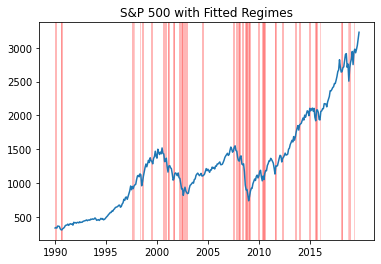

In [ ]:
## plot regimes over S&P

plt.plot(scratch[1:lengt+1,11]) ## sp500 index values
# plt.hlines(thresh,xmin=0,xmax=lengt,colors='orange')
# plt.plot(betas)
for i in range (0,lengt):
  if (y[i]<0):
    plt.axvspan(i-0.5,i+0.5,color='red', alpha=0.2)
plt.title("S&P 500 with Fitted Regimes")
xTix = np.arange(dates_econ[0].year,dates_econ[lengt-1].year,5)
xPos = np.arange(len(xTix))*60
plt.xticks(xPos,xTix)
plt.show()


In [ ]:
# ## Experiment

# lambS = np.array([0.001,0.1,0.1,1,10,100])
# threshS = np.array([-5,-4,-3,-2.5,-2,-1.5,-1,0])

# for lamb in lambS:
#   for thresh in threshS:
#     beta = np.zeros(lengt)

#     def fn(beta):
#         ans1 = np.sum((sp500U_l-beta)**2)
#         ans2 = 0.0
#         for i in range(lengt):
#             ans2 += lamb*np.abs(beta[i-1]-beta[i])
#         # print(ans1,ans2)
#         return (ans1+ans2)

#     res = minimize(fn, beta, method= 'COBYLA')
#     betas = res.x

#     y = np.zeros(lengt)
#     for i in range (0,lengt):
#         y[i] = np.sign(betas[i]-thresh)

#     print("Lambda: ",lamb)
#     print("Threshold: ",thresh)
#     print("Normal Pds: ", numNorm)
#     print("Crash Pds: ", numCrash)

#     plt.plot(scratch[1:lengt+1,11]) ## sp500 index values
#     # plt.hlines(thresh,xmin=0,xmax=lengt,colors='orange')
#     # plt.plot(betas)
#     for i in range (0,lengt):
#       if (y[i]<0):
#         plt.axvspan(i-0.5,i+0.5,color='red', alpha=0.2)
#     plt.title("S&P 500 with Fitted Regimes")
#     xTix = np.arange(dates_econ[0].year,dates_econ[lengt-1].year,5)
#     xPos = np.arange(len(xTix))*60
#     plt.xticks(xPos,xTix)
#     plt.show()

In [ ]:
## Calculating Transition Matrix

cTc = 0
nTn = 0

for i in range (334):
  if (y[i+1] == 1 and y[i] == 1):
      nTn += 1
  if (y[i+1] == -1 and y[i] == -1):
      cTc += 1

cTc = cTc/numCrash
nTn = nTn/numNorm

print(tabulate([['Normal',nTn,1-nTn],['Crash',1-cTc,cTc]], headers=['Start','to Normal','to Crash']))

Start      to Normal    to Crash
-------  -----------  ----------
Normal      0.833333    0.166667
Crash       0.770833    0.229167


### Returns and Risk

In [ ]:
## Returns and Covar matrix

normals_l = np.squeeze(np.where(y>0))
crashes_l = np.squeeze(np.where(y<0))
normals_s = np.squeeze(np.where(y[lengt-short:]>0))
crashes_s = np.squeeze(np.where(y[lengt-short:]<0))

normalRet_l = rreturnsU_l[normals_l,:7]
crashRet_l = rreturnsU_l[crashes_l,:7]
normalRet_s = rreturnsU_s[normals_s,]
crashRet_s = rreturnsU_s[crashes_s,]

print()

normalMeans_l = np.squeeze(np.asarray(np.mean(normalRet_l, axis=0)))
crashMeans_l = np.squeeze(np.asarray(np.mean(crashRet_l, axis=0)))
normalMeans_s = np.squeeze(np.asarray(np.mean(normalRet_s, axis=0)))
crashMeans_s = np.squeeze(np.asarray(np.mean(crashRet_s, axis=0)))

normalCovs_l = np.cov(normalRet_l, rowvar=False)
crashCovs_l = np.cov(crashRet_l, rowvar=False)
normalCovs_s = np.cov(normalRet_s, rowvar=False)
crashCovs_s = np.cov(crashRet_s, rowvar=False)

print("WITHOUT HOTEL:")
print("Normal / Crash Means:")
print(tabulate([np.round(1+normalMeans_l,3),
                np.round(1+crashMeans_l,3)], 
               headers=['USEq','USTr','HiY','RE','Com','RentV','Rent','Hotel']))
print("Normal Covar:")
print(np.round(normalCovs_l,3))
print("Crash Covar:")
print(np.round(crashCovs_l,3))

print("WITH HOTEL:")
print("Normal / Crash Means:")
print(tabulate([np.round(1+normalMeans_s,3),
                np.round(1+crashMeans_s,3)], 
               headers=['USEq','USTr','HiY','RE','Com','RentV','Rent','Hotel']))

print("Normal Covar:")
print(np.round(normalCovs_s,3))
print("Crash Covar:")
print(np.round(crashCovs_s,3))


WITHOUT HOTEL:
Normal / Crash Means:
  USEq    USTr    HiY     RE    Com    RentV    Rent
------  ------  -----  -----  -----  -------  ------
 1.018   1      1.011  1.018  1.003    1       1.002
 0.936   1.016  0.98   0.953  0.98     1.002   1.006
Normal Covar:
[[ 0.001  0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.001  0.     0.    -0.     0.    -0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.     0.     0.     0.002  0.     0.     0.   ]
 [ 0.    -0.     0.     0.     0.001  0.     0.   ]
 [ 0.     0.     0.     0.     0.     0.     0.   ]
 [ 0.    -0.     0.     0.     0.     0.     0.   ]]
Crash Covar:
[[ 0.001  0.     0.001  0.001  0.001 -0.     0.   ]
 [ 0.     0.001 -0.     0.    -0.     0.     0.   ]
 [ 0.001 -0.     0.001  0.001  0.001 -0.     0.   ]
 [ 0.001  0.     0.001  0.006  0.002 -0.     0.   ]
 [ 0.001 -0.     0.001  0.002  0.003 -0.     0.   ]
 [-0.     0.    -0.    -0.    -0.     0.    -0.   ]
 [ 0.     0.     0.     0.     0.    -0.     0

In [ ]:
normalCorr_l = np.corrcoef(normalRet_l, rowvar=False)
crashCorr_l = np.corrcoef(crashRet_l, rowvar=False)
normalCorr_s = np.corrcoef(normalRet_s, rowvar=False)
crashCorr_s = np.corrcoef(crashRet_s, rowvar=False)

print("WITH HOTEL:")
print("Normal Correl:")
print(np.round(normalCorr_s,3))
print("Crash Correl:")
print(np.round(crashCorr_s,3))

print("WITHOUT HOTEL:")
print("Normal Correl:")
print(np.round(normalCorr_l,3))
print("Crash Correl:")
print(np.round(crashCorr_l,3))



WITH HOTEL:
Normal Correl:
[[ 1.    -0.174  0.639  0.522  0.368 -0.012  0.081 -0.01 ]
 [-0.174  1.    -0.002  0.194 -0.23   0.106 -0.172 -0.171]
 [ 0.639 -0.002  1.     0.612  0.397  0.241  0.064 -0.018]
 [ 0.522  0.194  0.612  1.     0.062  0.081 -0.042 -0.116]
 [ 0.368 -0.23   0.397  0.062  1.     0.004  0.049  0.137]
 [-0.012  0.106  0.241  0.081  0.004  1.     0.233 -0.053]
 [ 0.081 -0.172  0.064 -0.042  0.049  0.233  1.    -0.046]
 [-0.01  -0.171 -0.018 -0.116  0.137 -0.053 -0.046  1.   ]]
Crash Correl:
[[ 1.     0.284  0.671  0.749  0.601 -0.001  0.155  0.074]
 [ 0.284  1.    -0.085  0.256  0.005  0.163  0.086  0.061]
 [ 0.671 -0.085  1.     0.556  0.533 -0.217  0.16   0.097]
 [ 0.749  0.256  0.556  1.     0.437 -0.139  0.243  0.05 ]
 [ 0.601  0.005  0.533  0.437  1.     0.046  0.121  0.042]
 [-0.001  0.163 -0.217 -0.139  0.046  1.    -0.23   0.178]
 [ 0.155  0.086  0.16   0.243  0.121 -0.23   1.    -0.01 ]
 [ 0.074  0.061  0.097  0.05   0.042  0.178 -0.01   1.   ]]
WITHOUT HOTEL

[[ 0.    0.41  0.47  0.    0.12]
 [ 0.    0.41  0.47  0.    0.12]
 [ 0.    0.41  0.47  0.    0.12]
 [-0.    0.41  0.47 -0.    0.12]
 [ 0.    0.35  0.6   0.    0.05]
 [-0.    0.25  0.75 -0.   -0.  ]
 [ 0.    0.08  0.9   0.02 -0.  ]
 [-0.   -0.    0.78  0.22 -0.  ]
 [-0.   -0.    0.4   0.6  -0.  ]
 [ 0.    0.    0.03  0.97  0.  ]
 [-0.01 -0.01 -0.01  1.03 -0.01]
 [-0.01 -0.01 -0.01  1.07 -0.01]
 [-0.02 -0.02 -0.02  1.11 -0.02]]


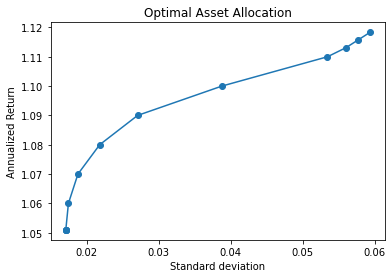

In [ ]:
## determine optimal allocation

assRet = np.asmatrix(rreturnsU_l[:,:5])
assCovar = np.cov(assRet, rowvar=False)
assMean = np.mean(assRet, axis=0)
annMean = assMean*12

## variance constraint
def var(x):
    allo = np.asmatrix(x)
    allo.reshape(5,1)
    preans= np.dot(allo, assCovar)
    ans = np.dot(preans, np.transpose(allo))
    return ans

## sum to 1
def constraint1(x):
    return 1-sum(x)

def constraint2(x):
    return sum(x)-1

## positivity
def constraint3(x):
    return x[0]

def constraint4(x):
    return x[1]

def constraint5(x):
    return x[2]

def constraint6(x):
    return x[3]

def constraint7(x):
    return x[4]

def constraint8(x):
    return np.dot(annMean,x)-ret

cons = ({'type':'ineq','fun': constraint1},
        {'type':'ineq','fun': constraint2},
        {'type':'ineq','fun': constraint3},
        {'type':'ineq','fun': constraint4},
        {'type':'ineq','fun': constraint5},
        {'type':'ineq','fun': constraint6},
        {'type':'ineq','fun': constraint7},
        {'type':'ineq','fun': constraint8})

x0=[1,0,0,0,0] ##starting point

risk_data = np.zeros(13)
ret_data = np.zeros(13)
opt_alloc = np.zeros((13,5))

for i in range(2,15):
    ret = i*0.01
    res = minimize(var, x0, method= 'COBYLA', constraints=cons)
    opt_alloc[i-2,:] = res.x
    ret_data[i-2]=np.dot(annMean,res.x)
    risk_data[i-2]=np.sqrt(var(res.x))

plt.scatter(risk_data, 1+ret_data)
plt.plot(risk_data, 1+ret_data)
plt.title("Optimal Asset Allocation")
plt.xlabel('Standard deviation')
plt.ylabel('Annualized Return')

print(np.round(opt_alloc,2))

## Simulation

In [ ]:
## Sim asset parameters

numMonths = 120
numSamps = 10
useLong = False

## U denotes variable used for sim
if useLong:
  numAssets = len(normalCovs_l)
  ## booleans of normal / regime pds
  normalsU = normals_l
  crashesU = crashes_l
  ## returns
  normalRetU = normalRet_l
  crashRetU = crashRet_l
  ## mean returns
  normalMeansU = normalMeans_l
  crashMeansU = crashMeans_l
  ## covar of returns
  normalCovsU = normalCovs_l
  crashCovsU = crashCovs_l

else:
  numAssets = len(normalCovs_s)
  normalsU = normals_s
  crashesU = crashes_s
  normalRetU = normalRet_s
  crashRetU = crashRet_s
  normalMeansU = normalMeans_s
  crashMeansU = crashMeans_s
  normalCovsU = normalCovs_s
  crashCovsU = crashCovs_s


In [ ]:
## normal / crash sim

isCrash = np.zeros((numMonths,numSamps),dtype=np.bool)

rrates = np.zeros((numMonths,numAssets,numSamps))

## Markov chain for normal and crash    
for s in range (numSamps):
    crash = False;
    for m in range (numMonths):
        isCrash[m,s] = crash
        crashNo = random.random()
        if crash == False:
            rrates[m,:,s] = np.random.multivariate_normal(normalMeansU, normalCovsU)
            nextCrash = (crashNo > nTn)
        if crash == True:
            rrates[m,:,s] = np.random.multivariate_normal(crashMeansU, crashCovsU)
            nextCrash = (crashNo <= cTc)
        crash = nextCrash

print("Sim. Crash %: ", np.sum(isCrash)/(numSamps*numMonths)*100)

Sim. Crash %:  16.666666666666664


In [ ]:
## Check: extracting variables
vac = scratch[:lengt,13]
rent = scratch[:lengt,14]
hPPI = scratch[lengt-short:lengt,22]

print(vac[-1])
print(rent[-1])
print(hPPI[-1])

print(opt_alloc[2,:])
print(opt_alloc[7,:])

print(logC[-1])
print(B[-1])
print(A[-1])

6.7
1161
142.5
[4.44266368e-17 4.08921833e-01 4.70746228e-01 4.43936423e-17
 1.20331939e-01]
[-1.11022302e-16 -2.13842611e-16  7.79680392e-01  2.20319608e-01
 -2.20529770e-16]
8.103481929722548
3.5681708340864304
-2.949105404444349


In [ ]:
## Simulations

alloc1 = opt_alloc[5,:] ## safe
alloc2 = opt_alloc[6,:] ## aggr
alloc3 = opt_alloc[4,:] ## optionality

## total cash wealth
wealth1 = np.zeros((numMonths+1,numSamps))
wealth2 = np.zeros((numMonths+1,numSamps))

wealth1[0,:] = 0
wealth2[0,:] = 0

rentRev_rec = np.zeros((numMonths,numSamps))
rentPrice_rec = np.zeros((numMonths,numSamps))
rentVac_rec = np.zeros((numMonths,numSamps))

airRev_rec = np.zeros((numMonths,numSamps))
airPrice_rec = np.zeros((numMonths,numSamps))
airOcc_rec = np.zeros((numMonths,numSamps))


airTrend_rec = np.zeros((numMonths,numSamps))
airSeas_rec = np.zeros((numMonths,numSamps))

## scenario gen
for s in range(numSamps):
  print('sample ',s)
  ## initial values

  ## current monthly rent and % vacancy
  rentNow = rent[-1]
  vacNow = vac[-1]

  ## current nightly price/person and % occupancy
  airNow = float(np.asarray(medPPPs)[-1])
  airTrendNow = float(np.asarray(medPPPs)[-1])
  airSeasNow = 0
  occNow = .65
  airMin = 20

  ## current sigmoid params
  logcNow = logC[-1]
  aNow = A[-1]
  bNow = B[-1]
  demNow = sigmoid(np.log(airNow), np.exp(logcNow), aNow, bNow) ## demand on fitted sigmoid

  for m in range(numMonths):
    
    ## update quarterly for seasonality
    if (m%3) == 0:
      qtr = int((m/3)%4)

      noiseLogC_cons = np.nanstd(residLogC)
      noiseLogC = random.normalvariate(0,noiseLogC_cons)
      logcNow += float(seasLogC[qtr]) + noiseLogC

      noiseB_cons = np.nanstd(residB)
      noiseB = random.normalvariate(0,noiseB_cons)
      bNow += float(seasB[qtr]) + noiseB

      ## update price per person
      noisePPP_cons = np.nanstd(residPPP[20:])
      noisePPP = random.normalvariate(0,noisePPP_cons)
      airSeasNow = float(seasPPP[qtr]) + noisePPP
      # airNow += airSeasNow
      # airNow = max(airMin,airNow)
    airSeas_rec[m,s] = airSeasNow

    ## 0-4: asset returns; 5: rental vacancy; 6: rent; 7: hotel PPI
    rrate = 1+rrates[m,:,s]

    ## update airbnb

    airPrice_rec[m,s] = airNow
    airOcc_rec[m,s] = occNow
    airRev_rec[m,s] = int(30*occNow)*airNow

    airTrend_rec[m,s] = airTrendNow

    ## update airbnb price
    airTrendNow = airTrendNow*float(rrate[7])
    airNow = airTrendNow + airSeasNow
    airNow = max(airMin,airNow)

    ## new sigmoid
    logcNow = logcNow * rrate[7]
    bNow = bNow / rrate[7]
    demNew = sigmoid(np.log(airNow+.1), np.exp(logcNow), aNow, bNow)
    
    ## new occ% based on sigmoid
    occNow = occNow * demNew / demNow
    occNow = min(max(occNow,0.01),1)
    demNow = demNew

    ## update rental
    rentPrice_rec[m,s] = rentNow
    rentVac_rec[m,s] = vacNow
    
    if (random.random() > vacNow/100):
      rentRev_rec[m,s] = rentNow
    else:
      rentRev_rec[m,s] = airRev_rec[m,s]

    rentNow = rentNow * rrate[6]
    vacNow = vacNow * rrate[5]

    ## update cash / portfolio position
    wealth1[m+1,s] = np.sum(wealth1[m,s]*np.multiply(alloc1,rrate[0:5]))
    wealth2[m+1,s] = np.sum(wealth2[m,s]*np.multiply(alloc2,rrate[0:5]))

    wealth1[m+1,s] += airRev_rec[m,s]
    wealth2[m+1,s] += rentRev_rec[m,s]



sample  0
sample  1
sample  2
sample  3
sample  4
sample  5
sample  6
sample  7
sample  8
sample  9


## Output

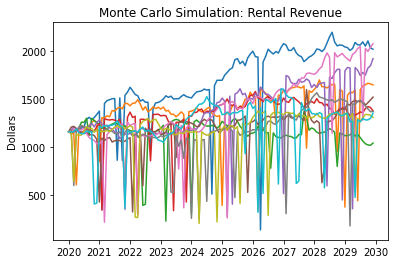

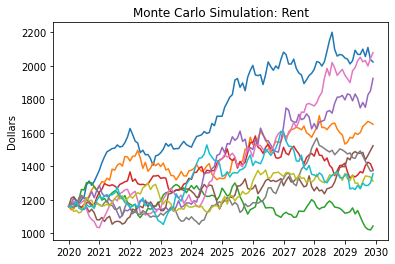

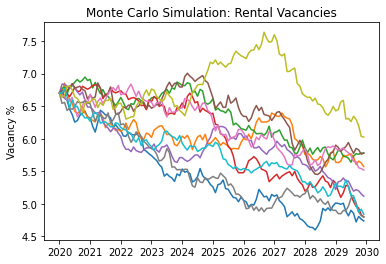

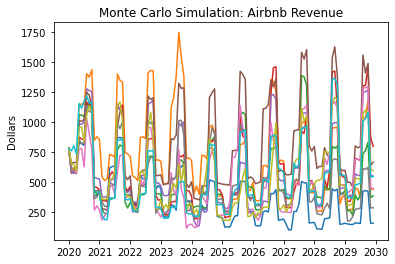

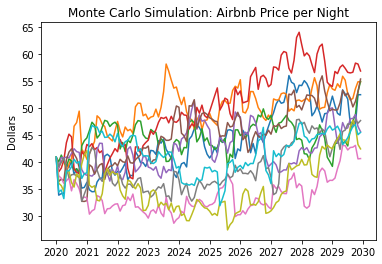

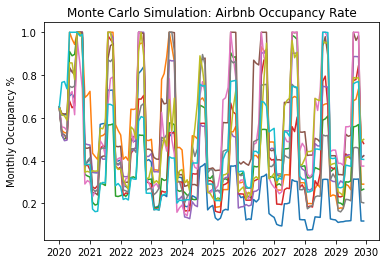

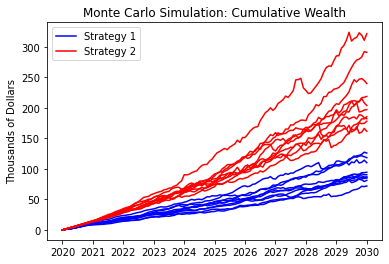

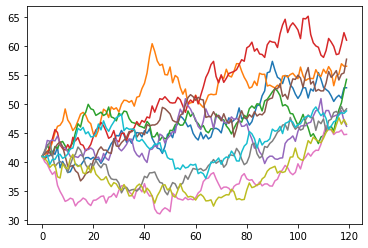

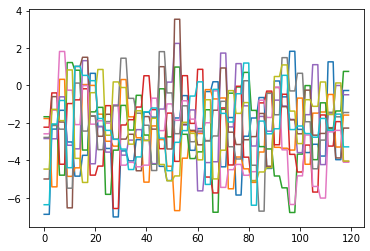

In [ ]:
##Rent
plt.plot(rentRev_rec)
plt.title('Monte Carlo Simulation: Rental Revenue')
plt.ylabel('Dollars')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

plt.plot(rentPrice_rec)
plt.title('Monte Carlo Simulation: Rent')
plt.ylabel('Dollars')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

plt.plot(rentVac_rec)
plt.title('Monte Carlo Simulation: Rental Vacancies')
plt.ylabel('Vacancy %')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

##Airbnb
plt.plot(airRev_rec)
plt.title('Monte Carlo Simulation: Airbnb Revenue')
plt.ylabel('Dollars')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

plt.plot(airPrice_rec)
plt.title('Monte Carlo Simulation: Airbnb Price per Night')
plt.ylabel('Dollars')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

plt.plot(airOcc_rec)
plt.title('Monte Carlo Simulation: Airbnb Occupancy Rate')
plt.ylabel('Monthly Occupancy %')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
plt.show()

## Wealth
plt.plot(wealth1/1000,color='blue',label='Strategy 1')
plt.plot(wealth2/1000,color='red',label='Strategy 2')
plt.title('Monte Carlo Simulation: Cumulative Wealth')
plt.ylabel('Thousands of Dollars')
xTix = np.arange('2020','2031',dtype='datetime64[Y]')
xPos = np.arange(start=0,stop=numMonths+12,step=12)
plt.xticks(xPos,xTix)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()

plt.plot(airTrend_rec)
plt.show()
plt.plot(airSeas_rec)
plt.show()

## Simulation 2.0

In [ ]:
## Sim asset parameters

numMonths = 120
numSamps = 200
useLong = False

## U denotes variable used for sim
if useLong:
  numAssets = len(normalCovs_l)
  ## booleans of normal / regime pds
  normalsU = normals_l
  crashesU = crashes_l
  ## returns
  normalRetU = normalRet_l
  crashRetU = crashRet_l
  ## mean returns
  normalMeansU = normalMeans_l
  crashMeansU = crashMeans_l
  ## covar of returns
  normalCovsU = normalCovs_l
  crashCovsU = crashCovs_l
  ## latest raw returns
  lastRaw = np.asarray(df_rawReturns.iloc[-1,1:-1])

else:
  numAssets = len(normalCovs_s)
  normalsU = normals_s
  crashesU = crashes_s
  normalRetU = normalRet_s
  crashRetU = crashRet_s
  normalMeansU = normalMeans_s
  crashMeansU = crashMeans_s
  normalCovsU = normalCovs_s
  crashCovsU = crashCovs_s
  lastRaw = np.asarray(df_rawReturns.iloc[-1,1:])

In [ ]:
## normal / crash sim

isCrash = np.zeros((numMonths,numSamps),dtype=np.bool)

rec_rateReturns = np.zeros((numMonths,numAssets,numSamps))
rec_rawReturns = np.zeros((numMonths,numAssets,numSamps))

## Markov chain for normal and crash    
for s in range (numSamps):
  raw_now = lastRaw
  crash = False;
  for m in range (numMonths):
      isCrash[m,s] = crash
      crashNo = random.random()
      if crash == False:
          rec_rateReturns[m,:,s] = np.random.multivariate_normal(normalMeansU, normalCovsU)
          nextCrash = (crashNo > nTn)
      if crash == True:
          rec_rateReturns[m,:,s] = np.random.multivariate_normal(crashMeansU, crashCovsU)
          nextCrash = (crashNo <= cTc)
      raw_now = np.multiply(raw_now,1+rec_rateReturns[m,:,s])
      rec_rawReturns[m,:,s] = raw_now
      crash = nextCrash

print("Sim. Crash %: ", np.sum(isCrash)/(numSamps*numMonths)*100)

Sim. Crash %:  17.4625


In [ ]:
## Check: extracting variables
vac = scratch[:lengt,13]
rent = scratch[:lengt,14]
hPPI = scratch[lengt-short:lengt,22]

print(vac[-1])
print(rent[-1])
print(hPPI[-1])

print(opt_alloc[2,:])
print(opt_alloc[7,:])

print(logC[-1])
print(B[-1])
print(A[-1])

6.7
1161
142.5
[4.44266368e-17 4.08921833e-01 4.70746228e-01 4.43936423e-17
 1.20331939e-01]
[-1.11022302e-16 -2.13842611e-16  7.79680392e-01  2.20319608e-01
 -2.20529770e-16]
8.103481929722548
3.5681708340864304
-2.949105404444349


In [ ]:
rec_rentPrices = np.zeros((numMonths,numSamps))
rec_airTrends = np.zeros((numMonths,numSamps))

for s in range(numSamps):
  pred_X = rec_rawReturns[:,:5,s]
  print(s)
  pred_X_large = np.concatenate((forRentDat[-13:,:5],pred_X),axis=0)
  
  ## add shifted historical terms, up to 1 year in the past
  for m in range(12):
    joiner = pred_X_large[m:m+pred_X.shape[0],:5]
    pred_X = np.concatenate((pred_X,joiner),axis=1)

  ## interaction terms
  numVars = pred_X.shape[1]
  for i in range(numVars):
    for j in range(numVars):
      inter_term = np.ones((pred_X.shape[0]))
      inter_term = np.multiply(inter_term,pred_X[:,i])
      inter_term = np.multiply(inter_term,pred_X[:,j])
      inter_term = np.transpose(np.array(inter_term, ndmin=2))
      pred_X = np.column_stack((pred_X,inter_term))

  rec_rentPrices[:,s] = rent_ridgePred.predict(pred_X)
  rec_airTrends[:,s] = air_lassoPred.predict(pred_X)


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199


### Sim Proper

Use regressions for LA, since correlated with macro variables better; take from Zillow rent / home price ranges

NOTE: Mortgages in US are simple mortgages, no compounding; we note that there are complications, eg investment horizon, but don't deal with that; consider using home refinance sales to pay off. Bc fixed rate mortgage, not necessarilya dvantageous to pay off early

In [ ]:
## Simulations

## lower opt_alloc indices are safer
str1_alloc = opt_alloc[5,:] ## no investment; pure Airbnb
str2_alloc = opt_alloc[6,:] ## no investment; rents; Airbnb if vacant
str3_alloc = opt_alloc[4,:] ## investment; lease to Airbnb; vary rent
str4_alloc = opt_alloc[4,:] ## investment; buy to Airbnb; vary mortgage
str5_alloc = opt_alloc[4,:] ## investment; buy to rent; Airbnb if vacant; vary mortgage

## range of rent values
baseRent = 2840
rentVals = np.round([baseRent*.75,baseRent*.9,baseRent,baseRent*1.1,baseRent*1.25])

## range of real estate prices
baseHome = 750000

## range of mortgage rates?
mortgageVals = [.05,.10,.15,.20,.3] ## APRs

## total cash wealth
str1_wealth = np.zeros((numMonths+1,numSamps))
str2_wealth = np.zeros((numMonths+1,numSamps))
str3_wealth = np.zeros((numMonths+1,numSamps,len(rentVals)))
str4_wealth = np.zeros((numMonths+1,numSamps,len(mortgageVals)))
str5_wealth = np.zeros((numMonths+1,numSamps,len(mortgageVals)))

## indebtedness
str3_red = np.zeros((numMonths+1,numSamps,len(rentVals)))
str4_red = np.zeros((numMonths+1,numSamps,len(mortgageVals)))
str5_red = np.zeros((numMonths+1,numSamps,len(mortgageVals)))

str1_wealth[0,:] = 0
str2_wealth[0,:] = 0
str3_wealth[0,:,:] = 0
str4_wealth[0,:,:] = 0
str5_wealth[0,:,:] = 0

rec_rentRev = np.zeros((numMonths,numSamps))
rec_rentVac = np.zeros((numMonths,numSamps))

rec_airRev = np.zeros((numMonths,numSamps))

## scenario gen
for s in range(numSamps):
  print('sample ',s)

  ## initial values

  ## current % vacancy for rented
  vacNow = vac[-1]

  rentNow = baseRent

  for m in range(numMonths):

    ## 0-4: asset returns; 5: rental vacancy; 6: rent; 7: hotel PPI
    rrate = 1+rec_rateReturns[m,:,s]

    ## update airbnb
    airRevNow = rec_airTrends[m,s] + airRev_seasonal[m%12] + np.random.normal(scale=airRev_noise)
    airRevNow = airRevNow*30
    rec_airRev[m,s] = airRevNow

    ## update rental
    rentNow *= rec_rentPrices[m,s]/rec_rentPrices[m-1,s]
    rec_rentVac[m,s] = vacNow
    
    isVac = random.random()
    if (isVac > vacNow/100):
      rec_rentRev[m,s] = rentNow
    else:
      rec_rentRev[m,s] = rec_airRev[m,s]

    vacNow = vacNow * rrate[5]

    ## update cash / portfolio position
    str1_wealth[m+1,s] = np.sum(str1_wealth[m,s]*np.multiply(str1_alloc,rrate[0:5]))
    str2_wealth[m+1,s] = np.sum(str2_wealth[m,s]*np.multiply(str2_alloc,rrate[0:5]))

    str1_wealth[m+1,s] += rec_airRev[m,s]
    str2_wealth[m+1,s] += rec_rentRev[m,s]

    ## rent payers
    for i in range(len(rentVals)):
      str3_wealth[m+1,s,i] = np.sum(str3_wealth[m,s,i]*np.multiply(str3_alloc,rrate[0:5])) ## update cash
      str3_wealth[m+1,s,i] += rec_airRev[m,s] ## revenue
      str3_wealth[m+1,s,i] -= rentVals[i]
      if(str3_wealth[m+1,s,i]<0):
        str3_wealth[m+1,s,i] = 0

      if(str3_wealth[m+1,s,i]<0):
        str3_red[m+1,s,i] += -1*str3_wealth[m+1,s,i]
        str3_wealth[m+1,s,i] = 0


    ## mortgage payers
    for i in range(len(mortgageVals)):
      str4_wealth[m+1,s,i] = np.sum(str4_wealth[m,s,i]*np.multiply(str4_alloc,rrate[0:5])) ## update cash
      str5_wealth[m+1,s,i] = np.sum(str5_wealth[m,s,i]*np.multiply(str5_alloc,rrate[0:5]))

      str4_wealth[m+1,s,i] += rec_airRev[m,s] ## revenue
      str5_wealth[m+1,s,i] += rec_rentRev[m,s]
      
      str4_wealth[m+1,s,i] -= (mortgageVals[i]/12+1/numMonths) * baseHome
      str5_wealth[m+1,s,i] -= (mortgageVals[i]/12+1/numMonths) * baseHome
      
      ## mortgage balance decreases by principal repayment
      str4_red[m+1,s,i] = str4_red[m,s,i] - baseHome/numMonths
      str5_red[m+1,s,i] = str5_red[m,s,i] - baseHome/numMonths
      
      if(str4_wealth[m+1,s,i]<0):
        str4_red[m+1,s,i] += -1*str4_wealth[m+1,s,i]
        str4_wealth[m+1,s,i] = 0

      if(str5_wealth[m+1,s,i]<0):
        str5_red[m+1,s,i] += -1*str5_wealth[m+1,s,i]
        str5_wealth[m+1,s,i] = 0

  str3_wealth[:,s,:] -= str3_red[:,s,:]
  str4_wealth[:,s,:] -= str4_red[:,s,:]
  str5_wealth[:,s,:] -= str5_red[:,s,:]


sample  0
sample  1
sample  2
sample  3
sample  4
sample  5
sample  6
sample  7
sample  8
sample  9
sample  10
sample  11
sample  12
sample  13
sample  14
sample  15
sample  16
sample  17
sample  18
sample  19
sample  20
sample  21
sample  22
sample  23
sample  24
sample  25
sample  26
sample  27
sample  28
sample  29
sample  30
sample  31
sample  32
sample  33
sample  34
sample  35
sample  36
sample  37
sample  38
sample  39
sample  40
sample  41
sample  42
sample  43
sample  44
sample  45
sample  46
sample  47
sample  48
sample  49
sample  50
sample  51
sample  52
sample  53
sample  54
sample  55
sample  56
sample  57
sample  58
sample  59
sample  60
sample  61
sample  62
sample  63
sample  64
sample  65
sample  66
sample  67
sample  68
sample  69
sample  70
sample  71
sample  72
sample  73
sample  74
sample  75
sample  76
sample  77
sample  78
sample  79
sample  80
sample  81
sample  82
sample  83
sample  84
sample  85
sample  86
sample  87
sample  88
sample  89
sample  90
sample  9

In [ ]:
def plotShade(wealth,col,justMed=False,strat=''): ## numMonths+1 numSamps
  plotMed = np.zeros(numMonths)
  plot5 = np.zeros(numMonths)
  plot95 = np.zeros(numMonths)
  plotX = np.arange(numMonths)
  
  for m in range(numMonths):
    plotMed[m] = np.median(wealth[m,:])
    plot5[m] = np.quantile(wealth[m,:],.05)
    plot95[m] = np.quantile(wealth[m,:],.95)
  if (not justMed):
    plt.fill_between(plotX,plot5,plot95,color=col,alpha=0.1)
  plt.plot(plotMed,color=col,label=strat)
  xTix = np.arange('2020','2031',dtype='datetime64[Y]')
  xPos = np.arange(start=0,stop=numMonths+12,step=12)
  plt.xticks(xPos,xTix)

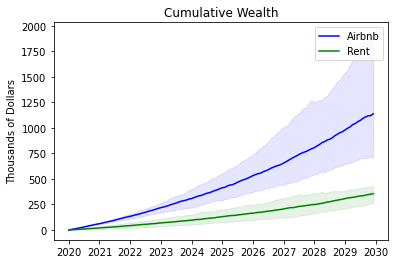

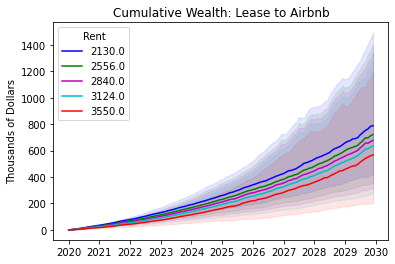

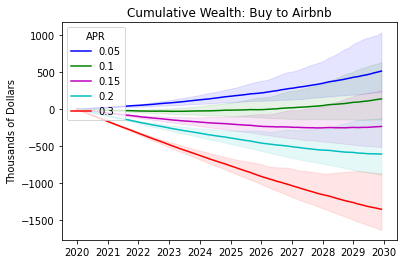

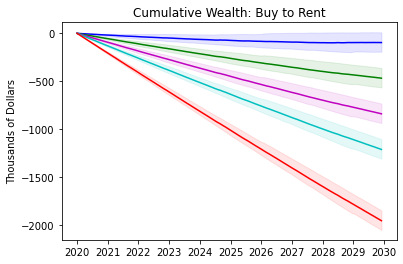

In [ ]:
## wealth by parameters
colorz = ['b','g','m','c','r','y','k']

plotShade(str1_wealth[:,:]/1000,colorz[0],False,'Airbnb')
plotShade(str2_wealth[:,:]/1000,colorz[1],False,'Rent')
plt.title('Cumulative Wealth')
plt.ylabel('Thousands of Dollars')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.show()


for i in range(str3_wealth.shape[2]):
  plotShade(str3_wealth[:,:,i]/1000,colorz[i],False,rentVals[i])
plt.title('Cumulative Wealth: Lease to Airbnb')
plt.ylabel('Thousands of Dollars')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='upper left',title="Rent")
plt.show()

for i in range(str4_wealth.shape[2]):
  plotShade(str4_wealth[:,:,i]/1000,colorz[i],False,mortgageVals[i])
plt.title('Cumulative Wealth: Buy to Airbnb')
plt.ylabel('Thousands of Dollars')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(),loc='upper left',title="APR")
plt.show()

for i in range(str5_wealth.shape[2]):
  plotShade(str5_wealth[:,:,i]/1000,colorz[i],False,mortgageVals[i])
plt.title('Cumulative Wealth: Buy to Rent')
plt.ylabel('Thousands of Dollars')
# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# plt.legend(by_label.values(), by_label.keys())
plt.show()


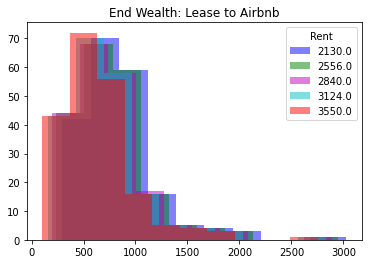

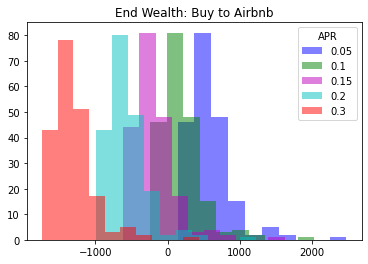

In [ ]:
# bins = np.linspace()

for i in range(str3_wealth.shape[2]):
  plt.hist(str3_wealth[-1,:,i]/1000,alpha=0.5,color=colorz[i],label=rentVals[i])
plt.title('End Wealth: Lease to Airbnb')
plt.legend(title='Rent')
plt.show()

for i in range(str4_wealth.shape[2]):
  plt.hist(str4_wealth[-1,:,i]/1000,alpha=0.5,color=colorz[i],label=mortgageVals[i])
plt.title('End Wealth: Buy to Airbnb')
plt.legend(title='APR')
plt.show()


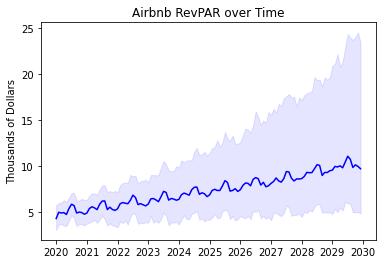

In [ ]:

plotShade(rec_airRev[:,]/1000,colorz[0])
plt.title('Airbnb RevPAR over Time')
plt.ylabel('Thousands of Dollars')

plt.show()
